#### Follow up and merged data analysis done at bottom of the notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.cluster import KMeans

In [2]:
import seaborn as sns

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [47]:
df1 = pd.read_csv('D:\Screening.csv')

In [10]:
df1.head()

,Date,Patient_ID,screen_no,Age,Gender,City,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,...,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease
0,2015-05-14,12-1101,1,39,F,Hyderabad,0.0,0.0,0.0,0.0,...,0.0,N,N,0.0,0.0,N,N,0,19.25,Healthy
1,2015-05-14,12-1102,1,34,F,Hyderabad,0.0,0.0,0.0,0.0,...,0.0,N,N,0.0,0.0,N,N,0,18.86,Healthy
2,2015-05-14,12-1103,1,74,F,Hyderabad,0.0,0.0,0.0,0.0,...,0.0,N,N,0.0,0.0,N,N,0,18.83,DB
3,2015-05-14,12-1105,1,39,F,Hyderabad,0.0,0.0,0.0,0.0,...,0.0,N,N,1.0,0.0,N,N,0,19.91,Healthy
4,2015-05-15,12-1106,1,34,F,Hyderabad,0.0,0.0,0.0,0.0,...,0.0,N,N,0.0,0.0,N,N,0,21.57,Healthy


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
Date                       10000 non-null object
Patient_ID                 10000 non-null object
screen_no                  10000 non-null int64
Age                        10000 non-null int64
Gender                     10000 non-null object
City                       10000 non-null object
Medication_DB              9640 non-null float64
Medication_HTN             9698 non-null float64
Medication_Thyroid         9627 non-null float64
Medication_Dyslipidemia    9610 non-null float64
other_diseases             8 non-null object
Mediaction_otherdisease    9616 non-null float64
Is_thyroid                 9958 non-null float64
Is_Dyslipidemia            9958 non-null float64
is_hypertension            10000 non-null object
Hypertension_family        10000 non-null object
BP_riskscore               9999 non-null float64
Is_diabetic                10000 non-null object
DB_family       

In [12]:
df1.shape

(10000, 26)

In [13]:
df1.isnull().sum()

Date                          0
Patient_ID                    0
screen_no                     0
Age                           0
Gender                        0
City                          0
Medication_DB               360
Medication_HTN              302
Medication_Thyroid          373
Medication_Dyslipidemia     390
other_diseases             9992
Mediaction_otherdisease     384
Is_thyroid                   42
Is_Dyslipidemia              42
is_hypertension               0
Hypertension_family           0
BP_riskscore                  1
Is_diabetic                   0
DB_family                     0
DB_category                  24
OB_category                   1
Heart_attack                  0
Smoking                       0
Alcohol                       0
BMI                           1
Disease                      15
dtype: int64

In [5]:
missing_values =pd.DataFrame(100*df1.isnull().sum()/len(df1),columns=["percentage of missing values"]).sort_values(ascending=False,by
                                                                                                       ="percentage of missing values")

In [6]:
missing_values # highest for other diseases(almost 100 % - we will remove this column)

,percentage of missing values
other_diseases,99.92
Medication_Dyslipidemia,3.90
Mediaction_otherdisease,3.84
Medication_Thyroid,3.73
Medication_DB,3.60
Medication_HTN,3.02
Is_Dyslipidemia,0.42
Is_thyroid,0.42
DB_category,0.24
Disease,0.15


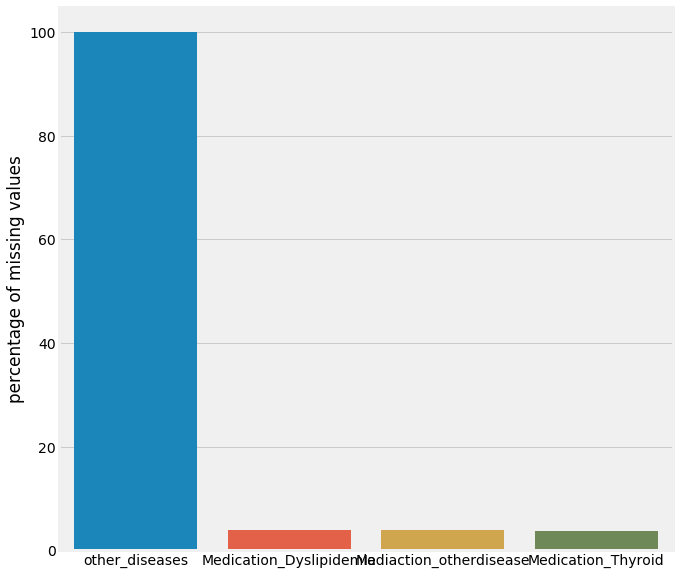

In [7]:
plt.figure(figsize=(11,10))
plt.style.use("fivethirtyeight")
sns.barplot(x=missing_values.index[:4],y=missing_values["percentage of missing values"][:4])
plt.show()

In [19]:
# Columns with almost 3- 4% of null values can be imputed.

missing_val = missing_values.index[1:13]
missing_val

Index(['Medication_Dyslipidemia', 'Mediaction_otherdisease',
       'Medication_Thyroid', 'Medication_DB', 'Medication_HTN',
       'Is_Dyslipidemia', 'Is_thyroid', 'DB_category', 'Disease',
       'BP_riskscore', 'OB_category', 'BMI'],
      dtype='object')

In [4]:
df_num = df1.select_dtypes(['number'])

In [5]:
df_num.columns

Index(['screen_no', 'Age', 'Medication_DB', 'Medication_HTN',
       'Medication_Thyroid', 'Medication_Dyslipidemia',
       'Mediaction_otherdisease', 'Is_thyroid', 'Is_Dyslipidemia',
       'BP_riskscore', 'DB_category', 'OB_category', 'Alcohol', 'BMI'],
      dtype='object')

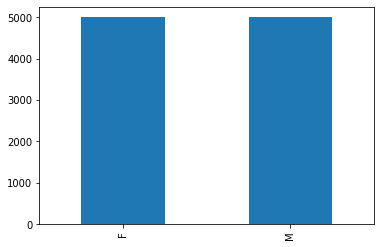

In [4]:
df1["Gender"].value_counts().plot(kind = 'bar')
plt.show()

In [12]:
df1["Gender"].value_counts()            # Equal number of male and females.


F    5000
M    5000
Name: Gender, dtype: int64

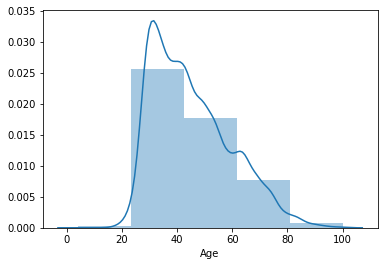

In [15]:
sns.distplot(df1["Age"],bins = 5)  # 20 to 40 age group makes the majority


In [17]:
df1[df1["Gender"] == 'F']['Age'].describe()   # For females, mean age 44,min - 4 , max - 100

count    5000.000000
mean       44.245800
std        13.811297
min         4.000000
25%        33.000000
50%        42.000000
75%        53.000000
max       100.000000
Name: Age, dtype: float64

In [18]:
df1[df1["Gender"] == 'M']['Age'].describe() # mean age for males 46, min - 18, max - 98

count    5000.000000
mean       46.325400
std        14.561343
min        18.000000
25%        34.000000
50%        44.000000
75%        56.000000
max        98.000000
Name: Age, dtype: float64

In [25]:
df1[df1["Gender"] == 'M']['Age'].value_counts(bins=4)  # Middle aged - largest population , above > 60 - more males than females

(38.0, 58.0]      2069
(17.919, 38.0]    1814
(58.0, 78.0]      1008
(78.0, 98.0]       109
Name: Age, dtype: int64

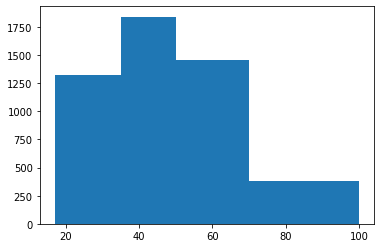

In [25]:
plt.hist(df1[df1["Gender"] == 'M']['Age'],bins = [17,35,50,70,100]) 
plt.show()

In [8]:
df1[df1["Gender"] == 'F']['Age'].value_counts(bins=5)  # (23.2 - 42.4) - population of females highest for this age group

(23.2, 42.4]     2611
(42.4, 61.6]     1682
(61.6, 80.8]      613
(80.8, 100.0]      68
(3.903, 23.2]      26
Name: Age, dtype: int64

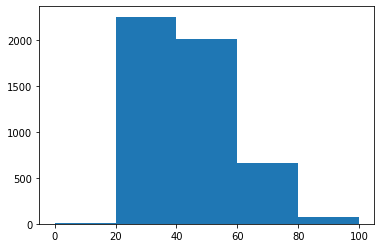

In [23]:
plt.hist(df1[df1["Gender"] == 'F']['Age'],bins = [0,20,40,60,80,100]) 
plt.show()

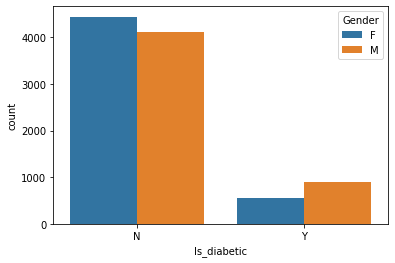

In [19]:
sns.countplot(df1["Is_diabetic"],hue = df1['Gender'])  # Males are more diabetic than females.

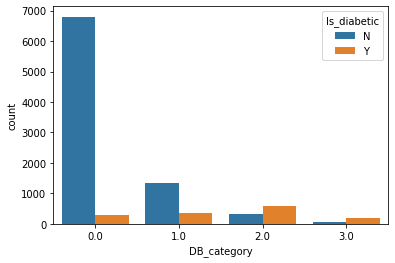

In [6]:
sns.countplot(df1["DB_category"],hue = df1['Is_diabetic']) 
plt.show()

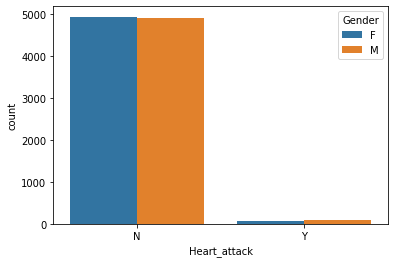

In [20]:
sns.countplot(df1["Heart_attack"],hue = df1['Gender']) 

In [5]:
df1[df1["Gender"] == 'M']["Heart_attack"].value_counts()   # heartattack count for males

N    4905
Y      95
Name: Heart_attack, dtype: int64

In [6]:
df1[df1["Gender"] == 'F']["Heart_attack"].value_counts()

N    4934
Y      66
Name: Heart_attack, dtype: int64

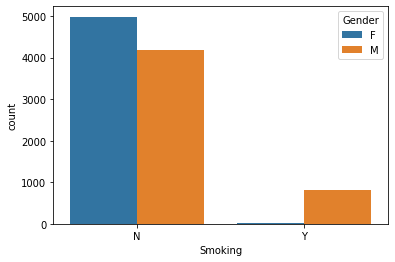

In [23]:
sns.countplot(df1["Smoking"],hue = df1['Gender'])   # More male smokers than females

In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
Patient_ID                 10000 non-null object
Age                        10000 non-null int64
Gender                     10000 non-null int64
Medication_DB              9640 non-null float64
Medication_HTN             9698 non-null float64
Medication_Thyroid         9627 non-null float64
Medication_Dyslipidemia    9610 non-null float64
Mediaction_otherdisease    9616 non-null float64
Is_thyroid                 9958 non-null float64
Is_Dyslipidemia            9958 non-null float64
is_hypertension            10000 non-null int64
Hypertension_family        10000 non-null int64
BP_riskscore               9999 non-null float64
Is_diabetic                10000 non-null int64
DB_family                  10000 non-null int64
DB_category                9976 non-null float64
OB_category                9999 non-null float64
Heart_attack               10000 non-null int64
Smoking          

In [62]:
df1.head()

,Date,Patient_ID,screen_no,Age,Gender,City,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,...,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease
0,2015-05-14,12-1101,1,39,F,Hyderabad,0.0,0.0,0.0,0.0,...,0.0,N,N,0.0,0.0,N,N,0,19.25,Healthy
1,2015-05-14,12-1102,1,34,F,Hyderabad,0.0,0.0,0.0,0.0,...,0.0,N,N,0.0,0.0,N,N,0,18.86,Healthy
2,2015-05-14,12-1103,1,74,F,Hyderabad,0.0,0.0,0.0,0.0,...,0.0,N,N,0.0,0.0,N,N,0,18.83,DB
3,2015-05-14,12-1105,1,39,F,Hyderabad,0.0,0.0,0.0,0.0,...,0.0,N,N,1.0,0.0,N,N,0,19.91,Healthy
4,2015-05-15,12-1106,1,34,F,Hyderabad,0.0,0.0,0.0,0.0,...,0.0,N,N,0.0,0.0,N,N,0,21.57,Healthy


In [48]:
df1.drop_duplicates(subset='Patient_ID', keep='first', inplace=True)

In [49]:
df1.shape

(9998, 26)

In [96]:

df1.drop('Patient_ID',axis = 1,inplace = True)

In [15]:
df1.drop(['Date','screen_no','City'],axis = 1,inplace = True)

In [16]:
df1.drop(['other_diseases','Mediaction_otherdisease'],axis = 1,inplace = True) 

In [17]:
df1.head()

,Age,Gender,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,is_hypertension,Hypertension_family,BP_riskscore,Is_diabetic,DB_family,DB_category,OB_category,Heart_attack,Smoking,Alcohol,BMI,Disease
0,39,F,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0,N,N,0.0,0.0,N,N,0,19.25,Healthy
1,34,F,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0,N,N,0.0,0.0,N,N,0,18.86,Healthy
2,74,F,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0,N,N,0.0,0.0,N,N,0,18.83,DB
3,39,F,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0,N,N,1.0,0.0,N,N,0,19.91,Healthy
4,34,F,0.0,0.0,0.0,0.0,0.0,0.0,N,N,0.0,N,N,0.0,0.0,N,N,0,21.57,Healthy


In [18]:
df1['Disease'].value_counts()

Healthy                                          4672
HTN                                              2005
DB-HTN                                           1302
OB                                                520
DB                                                485
HTN-OB                                            367
DB-HTN-OB                                         263
Obesity                                            93
DB-OB                                              83
Hypertension                                       56
Hypertension-Obesity                               46
Diabetes-Hypertension                              20
Diabetes-Hypertension-Obesity                      19
Diabetes-Obesity                                   13
Diabetes                                           13
Healthy-HTN                                         9
ThyroidDisorder                                     6
Obesity-ThyroidDisorder                             4
Diabetes-Hypertension-Obesit

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Age                        10000 non-null int64
Gender                     10000 non-null object
Medication_DB              9640 non-null float64
Medication_HTN             9698 non-null float64
Medication_Thyroid         9627 non-null float64
Medication_Dyslipidemia    9610 non-null float64
Is_thyroid                 9958 non-null float64
Is_Dyslipidemia            9958 non-null float64
is_hypertension            10000 non-null object
Hypertension_family        10000 non-null object
BP_riskscore               9999 non-null float64
Is_diabetic                10000 non-null object
DB_family                  10000 non-null object
DB_category                9976 non-null float64
OB_category                9999 non-null float64
Heart_attack               10000 non-null object
Smoking                    10000 non-null object
Alcohol                    10000 non-null int64
BMI         

In [20]:
df1.isnull().sum()

Age                          0
Gender                       0
Medication_DB              360
Medication_HTN             302
Medication_Thyroid         373
Medication_Dyslipidemia    390
Is_thyroid                  42
Is_Dyslipidemia             42
is_hypertension              0
Hypertension_family          0
BP_riskscore                 1
Is_diabetic                  0
DB_family                    0
DB_category                 24
OB_category                  1
Heart_attack                 0
Smoking                      0
Alcohol                      0
BMI                          1
Disease                     15
dtype: int64

In [21]:
df1['Disease'] = df1['Disease'].astype(str)

In [22]:
df1['Disease'] = df1['Disease'].str.replace('-', '')

In [23]:
df_categorical=df1[['Gender','is_hypertension','Is_diabetic','DB_family','Hypertension_family','Heart_attack','Smoking','Disease']]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease
0,0,0,0,0,0,0,0,14
1,0,0,0,0,0,0,0,14
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,14
4,0,0,0,0,0,0,0,14


In [24]:
df = df1.drop(df_categorical.columns, axis=1)
df= pd.concat([df, df_categorical], axis=1)
df.head()

,Age,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,Alcohol,BMI,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease
0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,19.25,0,0,0,0,0,0,0,14
1,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18.86,0,0,0,0,0,0,0,14
2,74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18.83,0,0,0,0,0,0,0,1
3,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,19.91,0,0,0,0,0,0,0,14
4,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,21.57,0,0,0,0,0,0,0,14


In [18]:
df['Disease'].value_counts()

13    4671
11    2005
1     1302
19     520
0      485
12     367
2      263
20      93
3       83
16      56
17      46
5       20
7       19
23      15
9       13
4       13
15       9
22       6
21       4
8        3
14       2
18       1
10       1
6        1
Name: Disease, dtype: int64

In [25]:
df2 = df.copy(deep = True) #for median imputation
df3 = df.copy(deep = True) # for simple imputation

In [23]:
from sklearn.experimental import enable_iterative_imputer  #IterativeImputer
from sklearn.impute import IterativeImputer 

In [24]:
imp = IterativeImputer(missing_values=np.nan, sample_posterior=False, 
                                 max_iter=10, tol=0.001, 
                                 n_nearest_features=4, initial_strategy='most_frequent') 
imp.fit(df)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\impute\_iterative.py:638: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='most_frequent',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=4, random_state=None,
                 sample_posterior=False, skip_complete=False, tol=0.001,
                 verbose=0)

In [26]:
df = pd.DataFrame(data=imp.transform(df), 
                             columns=['Age', 'Medication_DB', 'Medication_HTN',
       'Medication_Thyroid', 'Medication_Dyslipidemia',
        'Is_thyroid', 'Is_Dyslipidemia',
       'BP_riskscore', 'DB_category', 'OB_category', 'Alcohol', 'BMI',
       'Gender','is_hypertension', 'Is_diabetic', 'DB_family',
       'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease'],dtype='int')

NameError: name 'imp' is not defined

In [26]:
df.head()

,Age,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,Alcohol,BMI,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease
0,39,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0,0,13
1,34,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,13
2,74,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0
3,39,0,0,0,0,0,0,0,1,0,0,19,0,0,0,0,0,0,0,13
4,34,0,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,13


In [27]:
df.isnull().sum()

Age                        0
Medication_DB              0
Medication_HTN             0
Medication_Thyroid         0
Medication_Dyslipidemia    0
Is_thyroid                 0
Is_Dyslipidemia            0
BP_riskscore               0
DB_category                0
OB_category                0
Alcohol                    0
BMI                        0
Gender                     0
is_hypertension            0
Is_diabetic                0
DB_family                  0
Hypertension_family        0
Heart_attack               0
Smoking                    0
Disease                    0
dtype: int64

In [89]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#df_Scaled = sc.fit_transform(df) we will scale the data after train-test split to avoid info leakage

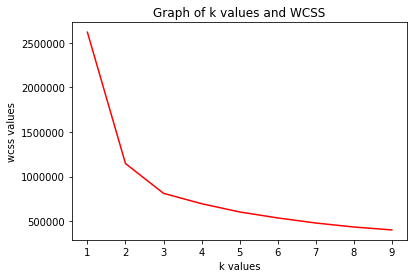

In [28]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

#### the cluster value can be taken anywhere between 3 and beyond (we are not taking 2 as after cluster 2 there is still and elbow formed at 3 and that means our inertia significantly drops after 2)

In [27]:
kmeans1 = KMeans(n_clusters=3, random_state=0)
kmeans1.fit(df)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

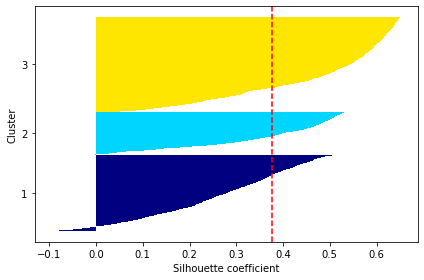

In [30]:
import plusmodules as pm
pm.svisualizer(df, 3)

In [32]:
centroids = kmeans1.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = df.columns)


In [33]:
centroid_df

,Age,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,Alcohol,BMI,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease
0,47.929617,0.180180,0.240428,1.126126e-03,3.632077e-18,0.001126,7.264155e-18,0.662162,0.557714,1.374437,0.063908,25.518300,0.500845,0.259291,0.193412,0.261261,0.282939,0.013232,0.092905,9.338682
1,67.751479,0.327909,0.490631,-5.963112e-17,4.930966e-04,0.000493,4.930966e-04,0.825937,0.764300,1.181460,0.070020,24.116371,0.566568,0.511341,0.339250,0.127712,0.137081,0.048323,0.097633,6.808679
2,32.844047,0.015165,0.023540,2.716161e-03,7.237050e-18,0.002943,2.263468e-04,0.239249,0.167270,1.000000,0.073110,22.933228,0.468764,0.029651,0.017881,0.230421,0.251471,0.003622,0.067904,12.875057


In [34]:
## creating a new dataframe only for labels 
df_labels = pd.DataFrame(kmeans1.labels_ , columns = list(['labels']))  # taking 3 clusters 

In [35]:
cvd_df_labeled = df.join(df_labels)

In [36]:
cvd_df_labeled.head()

,Age,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,...,BMI,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease,labels
0,39,0,0,0,0,0,0,0,0,0,...,19,0,0,0,0,0,0,0,13,2
1,34,0,0,0,0,0,0,0,0,0,...,18,0,0,0,0,0,0,0,13,2
2,74,0,0,0,0,0,0,0,0,0,...,18,0,0,0,0,0,0,0,0,1
3,39,0,0,0,0,0,0,0,1,0,...,19,0,0,0,0,0,0,0,13,2
4,34,0,0,0,0,0,0,0,0,0,...,21,0,0,0,0,0,0,0,13,2


In [37]:
cvd_df_labeled['labels'].isnull().sum()

0

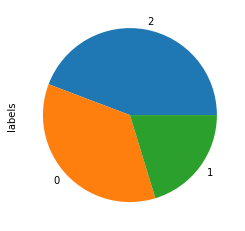

In [38]:
cvd_df_labeled['labels'].value_counts().plot(kind = 'pie')

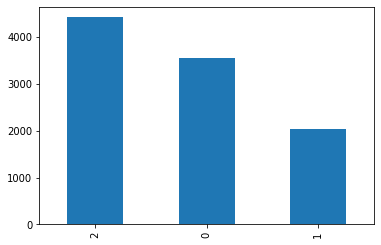

In [39]:
cvd_df_labeled['labels'].value_counts().plot(kind = 'bar')

In [40]:
cvd_df_labeled.columns

Index(['Age', 'Medication_DB', 'Medication_HTN', 'Medication_Thyroid',
       'Medication_Dyslipidemia', 'Is_thyroid', 'Is_Dyslipidemia',
       'BP_riskscore', 'DB_category', 'OB_category', 'Alcohol', 'BMI',
       'Gender', 'is_hypertension', 'Is_diabetic', 'DB_family',
       'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease', 'labels'],
      dtype='object')

In [42]:
cvd_df_labeled.groupby(['labels'])[['Age','OB_category','DB_category']].mean()   # 2 group looks healthy - highest

,Age,OB_category,DB_category
labels,,,
0,47.941392,1.373626,0.557904
1,67.756290,1.181549,0.764677
2,32.850520,1.000905,0.167345


In [43]:
cvd_df_labeled.groupby(['labels'])[['Age','BMI','BP_riskscore','is_hypertension']].mean() # 2- healthy, 1 - high risk, 0 - moderate risk

,Age,BMI,BP_riskscore,is_hypertension
labels,,,,
0,47.941392,25.513666,0.661595,0.259228
1,67.756290,24.119388,0.826344,0.511593
2,32.850520,22.937585,0.239937,0.029851


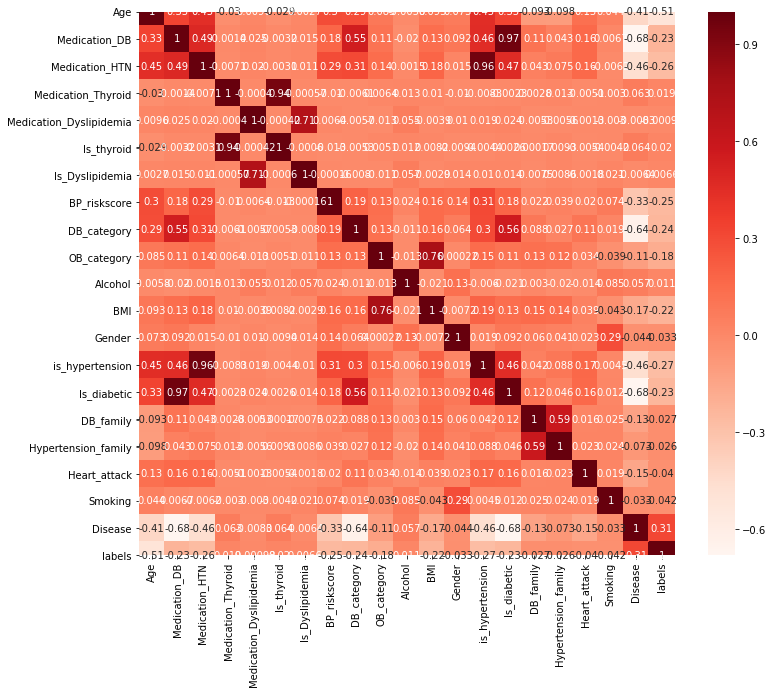

In [31]:
plt.figure(figsize=(12,10))
cor = cvd_df_labeled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [33]:
cvd_df_labeled.corr().T

,Age,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,...,BMI,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease,labels
Age,1.000000,0.331905,0.447007,-0.030347,0.009642,-0.028542,0.002700,0.295808,0.288546,0.085106,...,0.093009,0.073302,0.449665,0.334656,-0.092554,-0.097841,0.133106,0.044121,-0.412855,-0.509581
Medication_DB,0.331905,1.000000,0.485369,-0.001423,0.025078,-0.003223,0.014913,0.175084,0.547920,0.108940,...,0.134715,0.092437,0.459977,0.966765,0.113166,0.043238,0.161437,0.006724,-0.676325,-0.226627
Medication_HTN,0.447007,0.485369,1.000000,-0.007103,0.020299,-0.003071,0.010870,0.291165,0.306402,0.142617,...,0.180311,0.015389,0.958693,0.465856,0.043370,0.075291,0.161444,-0.006170,-0.459946,-0.260775
Medication_Thyroid,-0.030347,-0.001423,-0.007103,1.000000,-0.000400,0.942715,-0.000566,-0.010223,-0.006077,0.006352,...,0.010167,-0.010009,-0.008266,-0.002320,0.002844,0.012717,-0.005122,-0.002951,0.063267,0.018593
Medication_Dyslipidemia,0.009642,0.025078,0.020299,-0.000400,1.000000,-0.000425,0.707071,0.006404,-0.005658,-0.013012,...,-0.003947,0.010002,0.019461,0.024245,-0.005320,-0.005612,-0.001280,-0.003005,-0.008294,-0.000983
Is_thyroid,-0.028542,-0.003223,-0.003071,0.942715,-0.000425,1.000000,-0.000601,-0.012765,-0.005274,0.005098,...,0.008169,-0.009438,-0.004416,0.002558,0.000172,0.009343,-0.005433,-0.004201,0.063767,0.019723
Is_Dyslipidemia,0.002700,0.014913,0.010870,-0.000566,0.707071,-0.000601,1.000000,-0.000157,-0.008002,-0.010537,...,-0.002913,0.014145,0.010127,0.014227,-0.007524,0.008636,-0.001810,0.021411,-0.006384,0.006569
BP_riskscore,0.295808,0.175084,0.291165,-0.010223,0.006404,-0.012765,-0.000157,1.000000,0.194295,0.134417,...,0.156294,0.138383,0.306323,0.180611,0.021608,0.039281,0.019805,0.074210,-0.325238,-0.253817
DB_category,0.288546,0.547920,0.306402,-0.006077,-0.005658,-0.005274,-0.008002,0.194295,1.000000,0.133168,...,0.157225,0.063593,0.303657,0.562220,0.087642,0.026872,0.106558,0.019408,-0.640700,-0.240463
OB_category,0.085106,0.108940,0.142617,0.006352,-0.013012,0.005098,-0.010537,0.134417,0.133168,1.000000,...,0.762376,0.000222,0.151363,0.112348,0.132671,0.118708,0.034161,-0.038593,-0.110954,-0.184045


#### Feature Selection - Finding the significant features.

In [44]:
cor = cvd_df_labeled.corr()  # using pearson's coefficient

#Correlation with labels
cor_target = abs(cor['labels'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

Age                0.509581
Medication_DB      0.226627
Medication_HTN     0.260775
BP_riskscore       0.253817
DB_category        0.240463
OB_category        0.184045
BMI                0.215554
is_hypertension    0.268665
Is_diabetic        0.234659
Disease            0.313267
labels             1.000000
Name: labels, dtype: float64

##### base model

In [45]:
X = cvd_df_labeled.drop('labels',axis = 1)
y = cvd_df_labeled['labels']

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xs = sc.fit_transform(X)


In [48]:
from sklearn.model_selection import KFold


In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
score_lr = cross_val_score(lr, Xs, y,cv=kfold, scoring='neg_log_loss',n_jobs = -1)  #Standard Scaler

In [50]:
np.mean(score_lr)  #log loss

-0.05649616658760479

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
score_lrf = cross_val_score(lr, Xs, y,cv=kfold, scoring='f1_weighted',n_jobs= -1)

In [52]:
score_lrf.mean()  # F1 score /lr 

0.9933951296399751

In [80]:
1- np.mean(score_lrf),np.std(score_lrf,ddof = 1)  # bias and variance error

(0.006604870360024884, 0.0016753470831305255)

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [50]:
np.mean(score_lrm)  # min max increases the log loss so we go with standard scaler.

-0.20763757539580346

In [55]:
dt =DecisionTreeClassifier(criterion='entropy',max_depth= 6, min_samples_split=4)

In [56]:
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
score_dtf = cross_val_score(dt, Xs, y,cv=kfold, scoring='f1_weighted',n_jobs= -1)

In [57]:
score_dtf.mean()   # Logistics gives us better f1_score

0.988504452580008

In [58]:
1 - np.mean(score_dtf),np.std(score_dtf,ddof = 1)  #variance error is  high compared to LR but bias error is low .

(0.011495547419992036, 0.004052922921762211)

In [59]:
df2.isnull().sum()  # We will now apply normal median imputing and build a base model on this.

Age                          0
Medication_DB              360
Medication_HTN             302
Medication_Thyroid         373
Medication_Dyslipidemia    389
Is_thyroid                  42
Is_Dyslipidemia             42
BP_riskscore                 0
DB_category                 23
OB_category                  0
Alcohol                      0
BMI                          0
Gender                       0
is_hypertension              0
Is_diabetic                  0
DB_family                    0
Hypertension_family          0
Heart_attack                 0
Smoking                      0
Disease                      0
dtype: int64

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9999
Data columns (total 20 columns):
Age                        9998 non-null int64
Medication_DB              9638 non-null float64
Medication_HTN             9696 non-null float64
Medication_Thyroid         9625 non-null float64
Medication_Dyslipidemia    9609 non-null float64
Is_thyroid                 9956 non-null float64
Is_Dyslipidemia            9956 non-null float64
BP_riskscore               9998 non-null float64
DB_category                9975 non-null float64
OB_category                9998 non-null float64
Alcohol                    9998 non-null int64
BMI                        9998 non-null float64
Gender                     9998 non-null int32
is_hypertension            9998 non-null int32
Is_diabetic                9998 non-null int32
DB_family                  9998 non-null int32
Hypertension_family        9998 non-null int32
Heart_attack               9998 non-null int32
Smoking                    

In [22]:
df2.isnull().sum()

Age                          0
Medication_DB              360
Medication_HTN             302
Medication_Thyroid         373
Medication_Dyslipidemia    389
Is_thyroid                  42
Is_Dyslipidemia             42
BP_riskscore                 0
DB_category                 23
OB_category                  0
Alcohol                      0
BMI                          0
Gender                       0
is_hypertension              0
Is_diabetic                  0
DB_family                    0
Hypertension_family          0
Heart_attack                 0
Smoking                      0
Disease                      0
dtype: int64

In [23]:
df2.head(10)

,Age,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,Alcohol,BMI,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease
0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,19.25,0,0,0,0,0,0,0,13
1,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18.86,0,0,0,0,0,0,0,13
2,74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,18.83,0,0,0,0,0,0,0,0
3,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,19.91,0,0,0,0,0,0,0,13
4,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,21.57,0,0,0,0,0,0,0,13
5,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0,29.62,0,0,0,0,1,0,0,13
6,58,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,0,27.90,0,0,0,0,0,0,0,11
7,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,29.49,0,0,0,0,0,0,0,13
8,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,19.72,0,0,0,0,0,0,0,13
9,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,20.77,0,0,0,0,1,0,0,13


In [29]:
df2['Medication_Dyslipidemia'].fillna(0.0,inplace=True)
df2['Medication_Thyroid'].fillna(0.0,inplace=True)
df2['Medication_DB'].fillna(0.0,inplace=True)
df2['Medication_HTN'].fillna(0.0,inplace=True)
df2['DB_category'].fillna(0.0,inplace=True)
df2['Is_thyroid'].fillna(0.0,inplace=True)
df2['Is_Dyslipidemia'].fillna(0.0,inplace=True)




In [28]:
df2['Medication_HTN'].mode()

0    0.0
dtype: float64

In [30]:
df2.isnull().sum()

Age                        0
Medication_DB              0
Medication_HTN             0
Medication_Thyroid         0
Medication_Dyslipidemia    0
Is_thyroid                 0
Is_Dyslipidemia            0
BP_riskscore               0
DB_category                0
OB_category                0
Alcohol                    0
BMI                        0
Gender                     0
is_hypertension            0
Is_diabetic                0
DB_family                  0
Hypertension_family        0
Heart_attack               0
Smoking                    0
Disease                    0
dtype: int64

In [115]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9999
Data columns (total 20 columns):
Age                        9998 non-null int64
Medication_DB              9998 non-null float64
Medication_HTN             9998 non-null float64
Medication_Thyroid         9998 non-null float64
Medication_Dyslipidemia    9998 non-null float64
Is_thyroid                 9998 non-null float64
Is_Dyslipidemia            9998 non-null float64
BP_riskscore               9998 non-null float64
DB_category                9998 non-null float64
OB_category                9998 non-null float64
Alcohol                    9998 non-null int64
BMI                        9998 non-null float64
Gender                     9998 non-null int32
is_hypertension            9998 non-null int32
Is_diabetic                9998 non-null int32
DB_family                  9998 non-null int32
Hypertension_family        9998 non-null int32
Heart_attack               9998 non-null int32
Smoking                    

In [31]:
kmeans2 = KMeans(n_clusters=3, random_state=0)
kmeans2.fit(df2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [32]:
## creating a new dataframe only for labels of df2 
df2_labels = pd.DataFrame(kmeans2.labels_ , columns = list(['labels']))  # taking 3 clusters 

In [33]:
cvd_df2_labeled = df2.join(df2_labels)

In [34]:
cvd_df2_labeled.head()

,Age,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,...,BMI,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease,labels
0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.25,0,0,0,0,0,0,0,13,0.0
1,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.86,0,0,0,0,0,0,0,13,0.0
2,74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.83,0,0,0,0,0,0,0,0,1.0
3,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,19.91,0,0,0,0,0,0,0,13,0.0
4,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.57,0,0,0,0,0,0,0,13,0.0


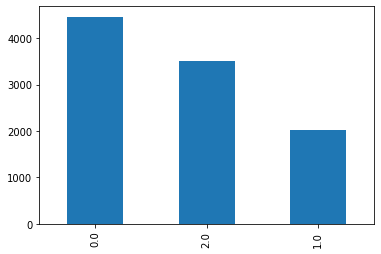

In [35]:
cvd_df2_labeled['labels'].value_counts().plot(kind = 'bar')

In [36]:
cvd_df2_labeled['labels'].isnull().sum()

2

In [37]:
cvd_df2_labeled['labels'].fillna(0.0,inplace = True)

In [38]:
cvd_df2_labeled['labels'].isnull().sum()

0

In [39]:
cvd_df2_labeled.groupby('labels')[['Age','BMI','Medication_HTN']].mean()  # 0 - healthy and forms the majority same as iterative imputer.

,Age,BMI,Medication_HTN
labels,,,
0.0,38.542928,23.720924,0.086752
1.0,56.568812,25.000144,0.356931
2.0,47.353426,25.443392,0.240262


In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [42]:
X2 = cvd_df2_labeled.drop('labels',axis = 1)
y2 = cvd_df2_labeled['labels']
X2s = sc.fit_transform(X2)



In [47]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
score_lr2 = cross_val_score(lr, X2s, y2,cv=kfold, scoring='f1_weighted',n_jobs= -1)

In [48]:
np.mean(score_lr2)

0.5616268280358342

In [49]:
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
score_dt2 = cross_val_score(dt, X2s, y2,cv=kfold, scoring='f1_weighted',n_jobs= -1)

NameError: name 'dt' is not defined

In [103]:
np.mean(score_dt2)

0.6666656167451002

#### Simple Imputation

In [28]:
df3.shape

(10000, 20)

In [29]:
df3.isnull().sum()

Age                          0
Medication_DB              360
Medication_HTN             302
Medication_Thyroid         373
Medication_Dyslipidemia    390
Is_thyroid                  42
Is_Dyslipidemia             42
BP_riskscore                 1
DB_category                 24
OB_category                  1
Alcohol                      0
BMI                          1
Gender                       0
is_hypertension              0
Is_diabetic                  0
DB_family                    0
Hypertension_family          0
Heart_attack                 0
Smoking                      0
Disease                      0
dtype: int64

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [32]:
imp.fit(df3)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [33]:
df3 = pd.DataFrame(data=imp.transform(df3), 
                             columns=['Age', 'Medication_DB', 'Medication_HTN',
       'Medication_Thyroid', 'Medication_Dyslipidemia',
        'Is_thyroid', 'Is_Dyslipidemia',
       'BP_riskscore', 'DB_category', 'OB_category', 'Alcohol', 'BMI',
       'Gender','is_hypertension', 'Is_diabetic', 'DB_family',
       'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease'],dtype='int')

In [34]:
df3.shape

(10000, 20)

In [35]:
df3.isnull().sum()

Age                        0
Medication_DB              0
Medication_HTN             0
Medication_Thyroid         0
Medication_Dyslipidemia    0
Is_thyroid                 0
Is_Dyslipidemia            0
BP_riskscore               0
DB_category                0
OB_category                0
Alcohol                    0
BMI                        0
Gender                     0
is_hypertension            0
Is_diabetic                0
DB_family                  0
Hypertension_family        0
Heart_attack               0
Smoking                    0
Disease                    0
dtype: int64

In [36]:
df3['Disease'].value_counts()

14    4672
12    2005
2     1302
20     520
1      485
13     367
3      263
21      93
4       83
17      56
18      46
6       20
8       19
24      15
5       13
10      13
16       9
23       6
22       4
9        3
15       2
19       1
11       1
7        1
0        1
Name: Disease, dtype: int64

In [37]:
df3['Disease'] = np.where(df3['Disease']==13,0,1)

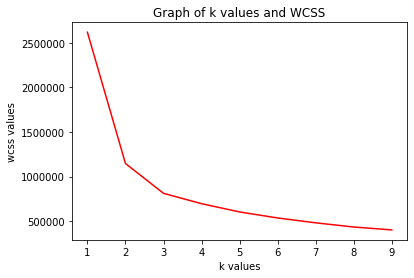

In [67]:
from sklearn.cluster import KMeans

wcss = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df3)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red')
plt.title('Graph of k values and WCSS')
plt.xlabel('k values')
plt.ylabel('wcss values')
plt.show()

In [39]:
import plusmodules as pm
kmeans2 = KMeans(n_clusters=3, random_state=0)
kmeans2.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

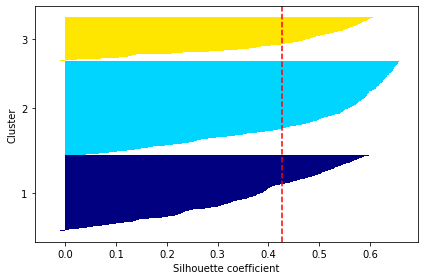

In [61]:
import plusmodules as pm
pm.svisualizer(df3, 3)

In [40]:
from sklearn import metrics
metrics.silhouette_score(df3,kmeans2.labels_)

0.42804797672295253

In [41]:
df3['labels'] = kmeans2.labels_

In [42]:
df3.groupby('labels')[['Age','BMI','Medication_HTN','OB_category']].agg(['mean'])  # 1- high risk, 0 -low risk, 2 - moderate risk

,Age,BMI,Medication_HTN,OB_category
,mean,mean,mean,mean
labels,,,,
0,32.783122,22.981624,0.027677,1.002722
1,67.728389,24.081532,0.483792,1.174853
2,47.933915,25.471597,0.238189,1.374016


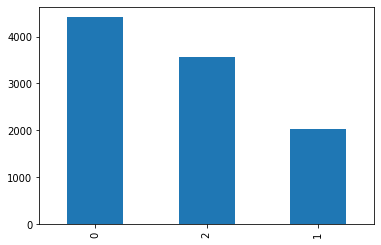

In [43]:
df3['labels'].value_counts().plot(kind = 'bar')

In [44]:
df3['labels'].value_counts()

0    4408
2    3556
1    2036
Name: labels, dtype: int64

In [45]:
df3.head()

,Age,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,...,BMI,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease,labels
0,39,0,0,0,0,0,0,0,0,0,...,19,0,0,0,0,0,0,0,1,0
1,34,0,0,0,0,0,0,0,0,0,...,18,0,0,0,0,0,0,0,1,0
2,74,0,0,0,0,0,0,0,0,0,...,18,0,0,0,0,0,0,0,1,1
3,39,0,0,0,0,0,0,0,1,0,...,19,0,0,0,0,0,0,0,1,0
4,34,0,0,0,0,0,0,0,0,0,...,21,0,0,0,0,0,0,0,1,0


In [46]:
#Feature selection by recursive backward elimination for simple imputed data.

X3 = df3.drop('labels',axis = 1)
y3 = df3['labels']

In [47]:
sc = StandardScaler()
X3s = sc.fit_transform(X3)


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
lr = LogisticRegression()

kfold = KFold(shuffle=True,n_splits=5,random_state=0)
score_sim_lr = cross_val_score(lr, X3s, y3,cv=kfold, scoring='f1_weighted',n_jobs= -1)

In [49]:
np.mean(score_sim_lr)

0.9942974064220443

In [80]:
1 - np.mean(score_sim_lr) , np.std(score_sim_lr,ddof = 1)  #bias and variance error

(0.006604870360024884, 0.0016753470831305255)

In [81]:
kfold = KFold(shuffle=True,n_splits=5,random_state=0)  # Decision Tree
score_sim_dt = cross_val_score(dt, X3s, y3,cv=kfold, scoring='f1_weighted',n_jobs= -1)

In [82]:
np.mean(score_sim_dt)

0.9887035595478612

In [83]:
1 - np.mean(score_sim_dt) , np.std(score_sim_dt,ddof = 1)  #bias and variance error(both more comapred to lr)

(0.011296440452138845, 0.004343197923502384)

In [50]:
import statsmodels.api as sm

#Feature selection by recursive backward elimination for simple imputed data
lr = LogisticRegression()
cols = list(X3.columns)     # X3 - is the labeled data after iterative imputation
pmax = 1
while (len(cols)>0):
    p= []
    X = X3[cols]
    
    model_lr0 = sm.GLM(y3,(sm.add_constant(X))).fit()
    p = pd.Series(model_lr0.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE_si = cols
print(selected_features_BE_si)

C:\Users\hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


['Age', 'Medication_HTN', 'BP_riskscore', 'DB_category', 'OB_category', 'BMI', 'Gender', 'Is_diabetic', 'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease']


backward elimination gives the same set of features except OB_category when applied on Simple imputed data compared to iteratively imputed data.

In [52]:
# statistical significance test on simple imputed data to get the significant features

pval=[]
selected_cols=[]
discarded_cols=[]
A0=df3[df3['labels']==0]
A1=df3[df3['labels']==1]
A2=df3[df3['labels']==2]
from scipy.stats import f_oneway
for col in X3.columns:
    res=f_oneway(A0[col],A1[col],A2[col])
    pval.append(res[1])
    if res[1]<0.05:
        selected_cols.append(col)     #means are significantly different
    else:
        discarded_cols.append(col)    # Null Hypothesis is True 
print(discarded_cols)
len(discarded_cols)


['Medication_Dyslipidemia', 'Is_thyroid', 'Is_Dyslipidemia', 'Alcohol']


4

In [53]:
print(selected_cols)   # statistical test gives us 17 columns while backward elimation gave us 12 columns
len(selected_cols)

['Age', 'Medication_DB', 'Medication_HTN', 'Medication_Thyroid', 'BP_riskscore', 'DB_category', 'OB_category', 'BMI', 'Gender', 'is_hypertension', 'Is_diabetic', 'DB_family', 'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease']


16

In [54]:
X3_final = X3[selected_cols]
X3s_final = sc.fit_transform(X3_final)

In [64]:
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
score_sim_lr1 = cross_val_score(lr, X3s_final, y3,cv=kfold, scoring='f1_weighted',n_jobs= -1)

In [65]:
np.mean(score_sim_lr1)

0.993596134742582

In [66]:
1 - np.mean(score_sim_lr1) , np.std(score_sim_lr1,ddof = 1)  #bias and variance error  # performance is same as backward elimination.

(0.006403865257417984, 0.001388637785000577)

#### Feature selction using p values for iteratively imputed data

In [106]:
#Feature selection by recursive backward elimination
lr = LogisticRegression()
cols = list(X.columns)     # X - is the labeled data after iterative imputation
pmax = 1
while (len(cols)>0):
    p= []
    X = X[cols]
    
    model_lr0 = sm.GLM(y,(sm.add_constant(X))).fit()
    p = pd.Series(model_lr0.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)
len(selected_features_BE)

['Age', 'Medication_DB', 'Medication_HTN', 'BP_riskscore', 'DB_category', 'OB_category', 'BMI', 'Gender', 'Is_diabetic', 'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease']


13

In [ ]:
# backward elimination on iterative imputed data gave us 13 columns

In [62]:
relevant_features   # from pearson 

Age                0.509581
Medication_DB      0.226627
Medication_HTN     0.260775
BP_riskscore       0.253817
DB_category        0.240463
OB_category        0.184045
BMI                0.215554
is_hypertension    0.268665
Is_diabetic        0.234659
Disease            0.313267
labels             1.000000
Name: labels, dtype: float64

In [107]:
# We will now build LR model on features selected through backward elimination.

X_bc = X[selected_features_BE]
Xs_bc = sc.fit_transform(X_bc)


In [108]:
X_bc.columns

Index(['Age', 'Medication_DB', 'Medication_HTN', 'BP_riskscore', 'DB_category',
       'OB_category', 'BMI', 'Gender', 'Is_diabetic', 'Hypertension_family',
       'Heart_attack', 'Smoking', 'Disease'],
      dtype='object')

In [109]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
score_lrb = cross_val_score(lr, Xs_bc, y,cv=kfold, scoring='f1_weighted',n_jobs= -1)

In [110]:
np.mean(score_lrb)  #marginal increase from 99.3 to 99.4

0.9941967582601924

In [112]:
1 - np.mean(score_lrb) , np.std(score_lrb,ddof = 1)  # variance error is the lowest till now.

(0.005803241739807619, 0.0009764545792572928)

In [111]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
log_lrb = cross_val_score(lr, Xs_bc, y,cv=kfold, scoring='neg_log_loss',n_jobs= -1)

In [67]:
np.mean(log_lrb) , np.std(log_lrb,ddof = 1)

(-0.05637957269780055, 0.004488675113535888)

In [114]:

a = pd.DataFrame({'LR/iterative/BE':score_lrb,'DT/median':score_dt2,'LR/median':score_lr2,'LR/iterative':score_lrf,'DT/iterative':score_dtf,'LR/SI':score_sim_lr,'DT/SI':score_sim_dt,'LR/SI/Stat':score_sim_lr1})

In [115]:
a.mean().sort_values(ascending = False)

LR/iterative/BE    0.994197
LR/SI/Stat         0.993596
LR/SI              0.993395
LR/iterative       0.993395
DT/iterative       0.988704
DT/SI              0.988504
DT/median          0.666666
LR/median          0.561627
dtype: float64

#### LR/iterative/BE performs the best among all. (LR model with iterative imputer and Backward elimanation for feature selection)

#### Median imputer doesn't perfom good here as we get a very low f1 score and simple imputer performs the second best after iterative imputer.
#### Both simple and iterative imputer in a way perform without much difference .

##### significant features as per Backward elimination - 'Age', 'Medication_DB', 'Medication_HTN', 'BP_riskscore', 'DB_category', 'OB_category', 'BMI', 'Gender', 'Is_diabetic', 'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease' 

In [166]:
dff = cvd_df_labeled[['Age', 'Medication_DB', 'Medication_HTN', 'BP_riskscore', 'DB_category', 'OB_category', 'BMI', 'Gender', 'Is_diabetic', 'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease','labels']]

In [167]:
dff.corr()  # correlation of  only significant features with labels(target)

,Age,Medication_DB,Medication_HTN,BP_riskscore,DB_category,OB_category,BMI,Gender,Is_diabetic,Hypertension_family,Heart_attack,Smoking,Disease,labels
Age,1.000000,0.331905,0.447007,0.295808,0.288230,0.085106,0.093009,0.073302,0.334656,-0.097841,0.133106,0.044121,-0.412855,-0.509581
Medication_DB,0.331905,1.000000,0.485369,0.175084,0.546944,0.108940,0.134715,0.092437,0.966765,0.043238,0.161437,0.006724,-0.676325,-0.226627
Medication_HTN,0.447007,0.485369,1.000000,0.291165,0.306275,0.142617,0.180311,0.015389,0.465856,0.075291,0.161444,-0.006170,-0.459946,-0.260775
BP_riskscore,0.295808,0.175084,0.291165,1.000000,0.194048,0.134417,0.156294,0.138383,0.180611,0.039281,0.019805,0.074210,-0.325238,-0.253817
DB_category,0.288230,0.546944,0.306275,0.194048,1.000000,0.133395,0.157363,0.063198,0.561278,0.027096,0.105561,0.019528,-0.639995,-0.240284
OB_category,0.085106,0.108940,0.142617,0.134417,0.133395,1.000000,0.762376,0.000222,0.112348,0.118708,0.034161,-0.038593,-0.110954,-0.184045
BMI,0.093009,0.134715,0.180311,0.156294,0.157363,0.762376,1.000000,-0.007247,0.134619,0.144236,0.038718,-0.043197,-0.172993,-0.215554
Gender,0.073302,0.092437,0.015389,0.138383,0.063198,0.000222,-0.007247,1.000000,0.092492,0.040782,0.023044,0.288151,-0.043645,-0.032529
Is_diabetic,0.334656,0.966765,0.465856,0.180611,0.561278,0.112348,0.134619,0.092492,1.000000,0.045769,0.163609,0.011926,-0.681025,-0.234659
Hypertension_family,-0.097841,0.043238,0.075291,0.039281,0.027096,0.118708,0.144236,0.040782,0.045769,1.000000,0.023180,0.023588,-0.073275,-0.026122


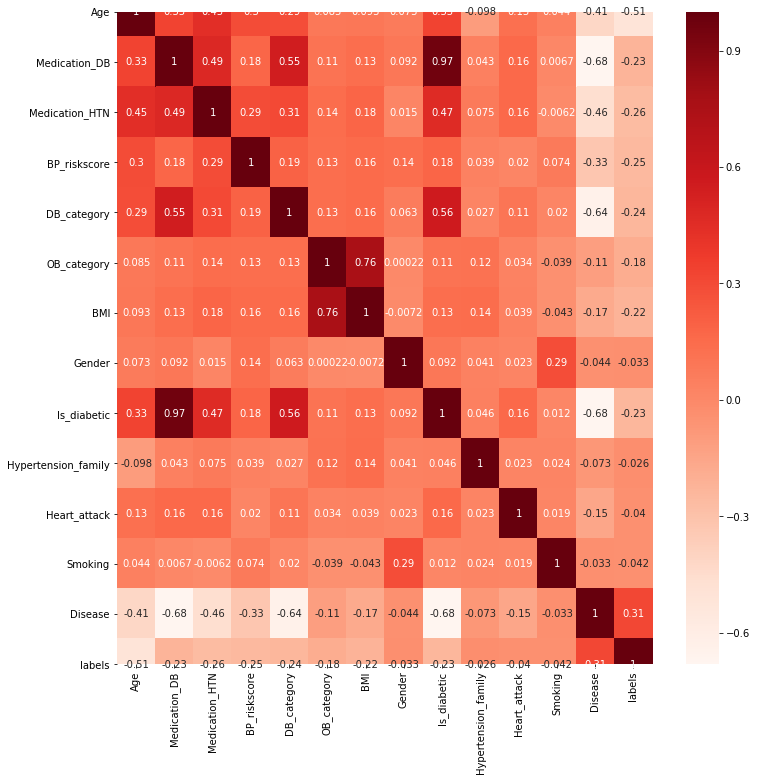

In [169]:
plt.figure(figsize=(12,12))
cor = dff.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [117]:
#correlation tabel for significant cols as per statistical tests

dfn = df3[['Age', 'Medication_DB', 'Medication_HTN', 'Medication_Thyroid', 'Is_thyroid', 'BP_riskscore', 'DB_category', 'OB_category', 'BMI', 'Gender', 'is_hypertension', 'Is_diabetic', 'DB_family', 'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease','labels']]
dfn.corr()

,Age,Medication_DB,Medication_HTN,Medication_Thyroid,Is_thyroid,BP_riskscore,DB_category,OB_category,BMI,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease,labels
Age,1.000000,0.331905,0.447007,-0.030347,-0.028542,0.295808,0.288230,0.085106,0.093009,0.073302,0.449665,0.334656,-0.092554,-0.097841,0.133106,0.044121,-0.412855,0.347315
Medication_DB,0.331905,1.000000,0.485369,-0.001423,-0.003223,0.175084,0.546944,0.108940,0.134715,0.092437,0.459977,0.966765,0.113166,0.043238,0.161437,0.006724,-0.676325,0.092979
Medication_HTN,0.447007,0.485369,1.000000,-0.007103,-0.003071,0.291165,0.306275,0.142617,0.180311,0.015389,0.958693,0.465856,0.043370,0.075291,0.161444,-0.006170,-0.459946,0.151588
Medication_Thyroid,-0.030347,-0.001423,-0.007103,1.000000,0.942715,-0.010223,-0.006061,0.006352,0.010167,-0.010009,-0.008266,-0.002320,0.002844,0.012717,-0.005122,-0.002951,0.063267,-0.005354
Is_thyroid,-0.028542,-0.003223,-0.003071,0.942715,1.000000,-0.012765,-0.005257,0.005098,0.008169,-0.009438,-0.004416,0.002558,0.000172,0.009343,-0.005433,-0.004201,0.063767,-0.000839
BP_riskscore,0.295808,0.175084,0.291165,-0.010223,-0.012765,1.000000,0.194048,0.134417,0.156294,0.138383,0.306323,0.180611,0.021608,0.039281,0.019805,0.074210,-0.325238,0.017990
DB_category,0.288230,0.546944,0.306275,-0.006061,-0.005257,0.194048,1.000000,0.133395,0.157363,0.063198,0.303547,0.561278,0.087857,0.027096,0.105561,0.019528,-0.639995,0.039608
OB_category,0.085106,0.108940,0.142617,0.006352,0.005098,0.134417,0.133395,1.000000,0.762376,0.000222,0.151363,0.112348,0.132671,0.118708,0.034161,-0.038593,-0.110954,-0.106426
BMI,0.093009,0.134715,0.180311,0.010167,0.008169,0.156294,0.157363,0.762376,1.000000,-0.007247,0.185840,0.134619,0.154024,0.144236,0.038718,-0.043197,-0.172993,-0.128814
Gender,0.073302,0.092437,0.015389,-0.010009,-0.009438,0.138383,0.063198,0.000222,-0.007247,1.000000,0.018944,0.092492,0.060068,0.040782,0.023044,0.288151,-0.043645,0.035843


#### Clustering on Follow up, adding follow_up column to screening and further analysis.( will be continued after getting the merged file)


In [6]:
f = pd.read_csv('D:\Follow.csv')


In [56]:
X3_final.head()  # labeled data(kmeans) of screening

,Age,Medication_DB,Medication_HTN,Medication_Thyroid,BP_riskscore,DB_category,OB_category,BMI,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease
0,39,0,0,0,0,0,0,19,0,0,0,0,0,0,0,1
1,34,0,0,0,0,0,0,18,0,0,0,0,0,0,0,1
2,74,0,0,0,0,0,0,18,0,0,0,0,0,0,0,1
3,39,0,0,0,0,1,0,19,0,0,0,0,0,0,0,1
4,34,0,0,0,0,0,0,21,0,0,0,0,0,0,0,1


In [59]:
X3_final['lables'] =  kmeans2.labels_

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
kmeans2.labels_

array([0, 0, 1, ..., 1, 2, 2])

In [60]:
X3_final['lables']

0       0
1       0
2       1
3       0
4       0
       ..
9995    1
9996    1
9997    1
9998    2
9999    2
Name: lables, Length: 10000, dtype: int32

In [8]:
f.columns

Index(['Patient_ID', 'DiagnosisDate', 'Age', 'Weight', 'Hip', 'Waist', 'BMI',
       'Systolic_left', 'Diastolic_Left', 'Systolic_Right', 'Diastolic_Right',
       'Blood_Sugar_Category', 'Blood_Sugar'],
      dtype='object')

In [9]:
f.shape

(4516, 13)

In [10]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4516 entries, 0 to 4515
Data columns (total 13 columns):
Patient_ID              4516 non-null object
DiagnosisDate           4516 non-null object
Age                     4516 non-null int64
Weight                  4516 non-null float64
Hip                     3814 non-null float64
Waist                   4516 non-null int64
BMI                     4508 non-null float64
Systolic_left           4516 non-null int64
Diastolic_Left          4516 non-null int64
Systolic_Right          843 non-null float64
Diastolic_Right         843 non-null float64
Blood_Sugar_Category    4351 non-null object
Blood_Sugar             3258 non-null float64
dtypes: float64(6), int64(4), object(3)
memory usage: 458.8+ KB


In [11]:
f['Blood_Sugar_Category'].value_counts()

Fasting         2784
Random          1559
Postprandial       8
Name: Blood_Sugar_Category, dtype: int64

In [12]:
f['Blood_Sugar_Category'].isnull().sum()

165

In [13]:
f['Blood_Sugar_Category'].fillna('Fasting',inplace = True)

In [14]:
f.drop('DiagnosisDate',axis = 1,inplace = True)

In [15]:
f['Patient_ID'].nunique() 

780

In [141]:
missing_follow =pd.DataFrame(100*f.isnull().sum()/len(f),columns=["percentage of missing values"]).sort_values(ascending=False,by
                                                                                                       ="percentage of missing values")

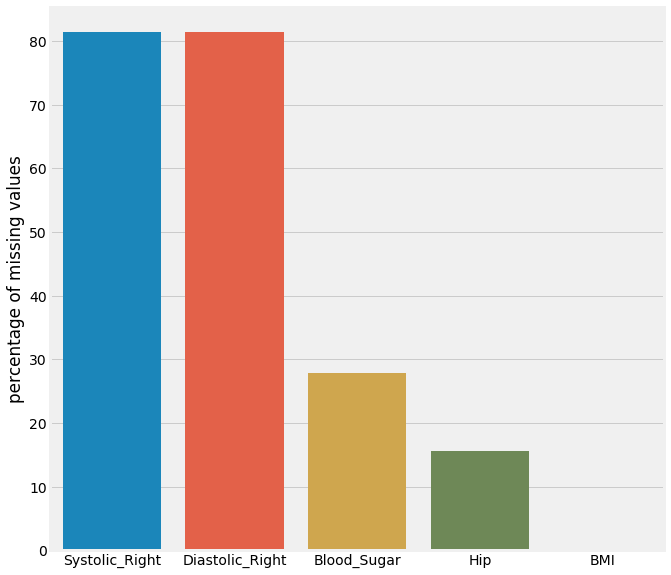

In [142]:
plt.figure(figsize=(11,10))
plt.style.use("fivethirtyeight")
sns.barplot(x=missing_follow.index[:5],y=missing_follow["percentage of missing values"][:5])
plt.show()

In [143]:
missing_follow

,percentage of missing values
Systolic_Right,81.333038
Diastolic_Right,81.333038
Blood_Sugar,27.856510
Hip,15.544730
BMI,0.177148
Patient_ID,0.000000
Age,0.000000
Weight,0.000000
Waist,0.000000
Systolic_left,0.000000


In [16]:
f_cat = f.select_dtypes('object')

In [17]:
f_num = f.select_dtypes('number')

In [18]:
f_cat.columns

Index(['Patient_ID', 'Blood_Sugar_Category'], dtype='object')

In [19]:
f_num.columns

Index(['Age', 'Weight', 'Hip', 'Waist', 'BMI', 'Systolic_left',
       'Diastolic_Left', 'Systolic_Right', 'Diastolic_Right', 'Blood_Sugar'],
      dtype='object')

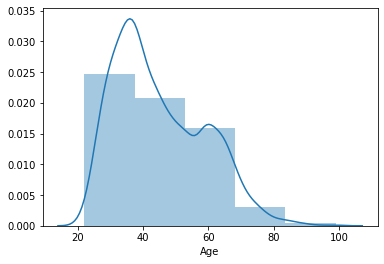

In [20]:


sns.distplot(f['Age'],bins = 5)  # The distribution shows the graph is denser around 20- 45, which means young people turn up for follow more


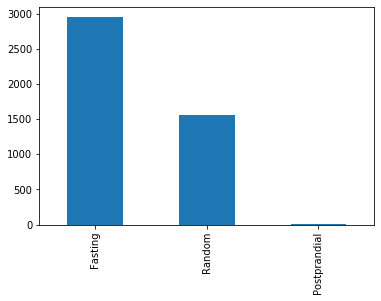

In [21]:
f['Blood_Sugar_Category'].value_counts().plot(kind = 'bar')
plt.show()

In [22]:
f['Blood_Sugar_Category'].value_counts()

Fasting         2949
Random          1559
Postprandial       8
Name: Blood_Sugar_Category, dtype: int64

In [23]:
f1 = f.drop('Patient_ID',axis = 1)

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()
f1['Blood_Sugar_Category'] = le.fit_transform(f1['Blood_Sugar_Category'])
f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4516 entries, 0 to 4515
Data columns (total 11 columns):
Age                     4516 non-null int64
Weight                  4516 non-null float64
Hip                     3814 non-null float64
Waist                   4516 non-null int64
BMI                     4508 non-null float64
Systolic_left           4516 non-null int64
Diastolic_Left          4516 non-null int64
Systolic_Right          843 non-null float64
Diastolic_Right         843 non-null float64
Blood_Sugar_Category    4516 non-null int32
Blood_Sugar             3258 non-null float64
dtypes: float64(6), int32(1), int64(4)
memory usage: 370.6 KB


In [27]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [28]:
imp.fit(f1)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [29]:
f1.columns

Index(['Age', 'Weight', 'Hip', 'Waist', 'BMI', 'Systolic_left',
       'Diastolic_Left', 'Systolic_Right', 'Diastolic_Right',
       'Blood_Sugar_Category', 'Blood_Sugar'],
      dtype='object')

In [30]:
f1 = pd.DataFrame(data=imp.transform(f1), 
                             columns=['Age', 'Weight', 'Hip', 'Waist', 'BMI', 'Systolic_left',
       'Diastolic_Left', 'Systolic_Right', 'Diastolic_Right',
       'Blood_Sugar_Category', 'Blood_Sugar'],dtype='int')

In [31]:
f1.isnull().sum()

Age                     0
Weight                  0
Hip                     0
Waist                   0
BMI                     0
Systolic_left           0
Diastolic_Left          0
Systolic_Right          0
Diastolic_Right         0
Blood_Sugar_Category    0
Blood_Sugar             0
dtype: int64

In [32]:
f1['Patient_ID'] = f['Patient_ID']

In [33]:
f1.head()

,Age,Weight,Hip,Waist,BMI,Systolic_left,Diastolic_Left,Systolic_Right,Diastolic_Right,Blood_Sugar_Category,Blood_Sugar,Patient_ID
0,59,61,34,38,24,145,85,137,86,2,79,30-2956
1,59,62,34,38,25,133,91,141,87,2,61,30-2956
2,59,62,37,38,25,147,85,147,86,2,56,30-2956
3,59,61,37,38,24,115,78,140,90,2,78,30-2956
4,59,62,37,39,25,140,87,141,91,2,86,30-2956


In [58]:
f1.shape

(4516, 12)

In [59]:
f1['Patient_ID'].value_counts()

NHIN24091600015014    36
NHIN14021700015003    35
NHIN29081600047019    34
NHIN05021700015001    32
D2D-38955             32
                      ..
D2D-38935              1
NHIN21061900070003     1
NHIN01031700026024     1
NHIN18091600026012     1
NHIN09021800050009     1
Name: Patient_ID, Length: 780, dtype: int64

In [35]:
b = pd.DataFrame(f1['Patient_ID'].value_counts().index.tolist())
b['Followup_counts'] = pd.DataFrame(f1['Patient_ID'].value_counts().values)

In [36]:
b.head()

,0,Followup_counts
0,NHIN24091600015014,36
1,NHIN14021700015003,35
2,NHIN29081600047019,34
3,NHIN05021700015001,32
4,D2D-38955,32


In [37]:
b['Patient_ID'] = b[0]

In [38]:
m = pd.merge(b,f1,on='Patient_ID')

In [39]:
m.head()

,0,Followup_counts,Patient_ID,Age,Weight,Hip,Waist,BMI,Systolic_left,Diastolic_Left,Systolic_Right,Diastolic_Right,Blood_Sugar_Category,Blood_Sugar
0,NHIN24091600015014,36,NHIN24091600015014,45,64,38,34,23,131,84,140,90,0,135
1,NHIN24091600015014,36,NHIN24091600015014,45,65,31,33,23,139,97,140,90,0,137
2,NHIN24091600015014,36,NHIN24091600015014,45,61,29,32,21,136,76,140,90,0,120
3,NHIN24091600015014,36,NHIN24091600015014,45,65,29,32,23,154,96,140,90,0,122
4,NHIN24091600015014,36,NHIN24091600015014,45,67,34,32,23,129,90,119,84,0,202


In [40]:
m.shape

(4516, 14)

In [41]:
m.isnull().sum()

0                       0
Followup_counts         0
Patient_ID              0
Age                     0
Weight                  0
Hip                     0
Waist                   0
BMI                     0
Systolic_left           0
Diastolic_Left          0
Systolic_Right          0
Diastolic_Right         0
Blood_Sugar_Category    0
Blood_Sugar             0
dtype: int64

In [42]:
m.drop(0,axis = 1,inplace = True)

In [43]:
m['Patient_ID'].nunique()

780

In [44]:
m.shape

(4516, 13)

In [45]:
m.drop_duplicates(subset='Patient_ID', keep='last', inplace=True)

In [60]:
m.shape

(780, 13)

In [61]:
m.head(10)

,Followup_counts,Patient_ID,Age,Weight,Hip,Waist,BMI,Systolic_left,Diastolic_Left,Systolic_Right,Diastolic_Right,Blood_Sugar_Category,Blood_Sugar
35,36,NHIN24091600015014,45,69,36,34,24,123,81,140,90,0,177
70,35,NHIN14021700015003,58,57,36,34,21,142,91,140,90,0,132
104,34,NHIN29081600047019,31,69,37,35,26,121,88,140,90,2,93
136,32,NHIN05021700015001,53,50,35,33,18,102,67,140,90,0,77
168,32,D2D-38955,65,89,46,43,44,128,76,140,90,0,142
200,32,NHIN26091600015009,62,72,39,35,29,124,62,140,90,0,200
232,32,NHIN26111600015007,59,57,30,32,23,152,86,156,91,0,121
263,31,NHIN07101600015002,44,75,34,33,30,87,68,140,90,0,147
292,29,NHIN08031700050005,44,90,40,41,29,157,106,169,111,2,85
321,29,NHIN29081600047018,37,80,42,36,27,118,82,140,90,2,0


In [101]:
mm = m.drop(['Followup_counts','Systolic_Right','Diastolic_Right','Weight','Hip','Waist','Age','BMI'],axis = 1)


In [98]:
a = m['Age']

In [99]:
b = m['BMI']

In [110]:
mm['Follow_up'] = 1  # This dataframe mm will be merged with screening data(base)

In [111]:
mm.head()

,Patient_ID,Systolic_left,Diastolic_Left,Blood_Sugar_Category,Blood_Sugar,Follow_up
35,NHIN24091600015014,123,81,0,177,1
70,NHIN14021700015003,142,91,0,132,1
104,NHIN29081600047019,121,88,2,93,1
136,NHIN05021700015001,102,67,0,77,1
168,D2D-38955,128,76,0,142,1


In [102]:
X3_final['Patient_ID'] = df1['Patient_ID']

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
X3_final.head()

,Age,Medication_DB,Medication_HTN,Medication_Thyroid,BP_riskscore,DB_category,OB_category,BMI,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease,lables,Patient_ID
0,39,0,0,0,0,0,0,19,0,0,0,0,0,0,0,1,0,12-1101
1,34,0,0,0,0,0,0,18,0,0,0,0,0,0,0,1,0,12-1102
2,74,0,0,0,0,0,0,18,0,0,0,0,0,0,0,1,1,12-1103
3,39,0,0,0,0,1,0,19,0,0,0,0,0,0,0,1,0,12-1105
4,34,0,0,0,0,0,0,21,0,0,0,0,0,0,0,1,0,12-1106


In [104]:
m1 = pd.merge(m,X3_final,on='Patient_ID')

In [105]:
m1.head()

,Followup_counts,Patient_ID,Age_x,Weight,Hip,Waist,BMI_x,Systolic_left,Diastolic_Left,Systolic_Right,...,BMI_y,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease,lables
0,36,NHIN24091600015014,45,69,36,34,24,123,81,140,...,23,1,0,0,0,0,0,0,1,2
1,35,NHIN14021700015003,58,57,36,34,21,142,91,140,...,21,1,1,1,0,0,0,0,1,1
2,34,NHIN29081600047019,31,69,37,35,26,121,88,140,...,26,1,0,0,0,0,0,1,1,0
3,32,D2D-38955,65,89,46,43,44,128,76,140,...,43,1,1,1,1,1,0,0,1,1
4,32,NHIN26091600015009,62,72,39,35,29,124,62,140,...,28,1,1,1,0,0,0,0,1,1


In [106]:
m1.columns

Index(['Followup_counts', 'Patient_ID', 'Age_x', 'Weight', 'Hip', 'Waist',
       'BMI_x', 'Systolic_left', 'Diastolic_Left', 'Systolic_Right',
       'Diastolic_Right', 'Blood_Sugar_Category', 'Blood_Sugar', 'Age_y',
       'Medication_DB', 'Medication_HTN', 'Medication_Thyroid', 'BP_riskscore',
       'DB_category', 'OB_category', 'BMI_y', 'Gender', 'is_hypertension',
       'Is_diabetic', 'DB_family', 'Hypertension_family', 'Heart_attack',
       'Smoking', 'Disease', 'lables'],
      dtype='object')

In [107]:
m1.drop('Age_y',axis = 1,inplace = True)

In [81]:
m1.shape

(781, 33)

In [108]:
m1['Patient_ID'].nunique()

780

In [109]:
m1.tail(10)

,Followup_counts,Patient_ID,Age_x,Weight,Hip,Waist,BMI_x,Systolic_left,Diastolic_Left,Systolic_Right,...,BMI_y,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease,lables
770,1,NHIN02121600015003,54,72,27,30,27,98,78,140,...,28,0,0,1,0,0,0,0,1,2
771,1,NHIN04121600018001,49,55,30,32,22,126,91,140,...,22,0,1,1,0,0,0,0,1,2
772,1,NHIN04061600015001,34,105,38,46,42,150,120,140,...,41,0,1,0,0,1,0,0,1,0
773,1,NHIN22031700046001,48,52,36,36,20,122,63,140,...,20,1,0,1,1,0,0,0,1,2
774,1,NHIN09021800050018,38,52,33,30,18,100,72,140,...,17,1,0,0,1,0,0,1,1,0
775,1,NHIN09121600004002,30,55,34,30,19,117,78,140,...,19,1,0,0,1,0,0,0,1,0
776,1,NHIN26071900070003,30,64,35,30,22,126,71,140,...,22,1,0,0,0,0,0,0,1,0
777,1,NHIN09021800065022,36,51,34,31,20,98,65,140,...,20,0,0,0,0,0,0,0,1,0
778,1,NHIN14071600020004,69,69,38,37,23,141,77,140,...,20,1,1,1,0,0,1,0,1,1
779,1,NHIN19091600046002,75,74,38,34,30,112,61,140,...,32,1,1,1,0,0,0,0,1,1


In [110]:
m1.isnull().sum()

Followup_counts         0
Patient_ID              0
Age_x                   0
Weight                  0
Hip                     0
Waist                   0
BMI_x                   0
Systolic_left           0
Diastolic_Left          0
Systolic_Right          0
Diastolic_Right         0
Blood_Sugar_Category    0
Blood_Sugar             0
Medication_DB           0
Medication_HTN          0
Medication_Thyroid      0
BP_riskscore            0
DB_category             0
OB_category             0
BMI_y                   0
Gender                  0
is_hypertension         0
Is_diabetic             0
DB_family               0
Hypertension_family     0
Heart_attack            0
Smoking                 0
Disease                 0
lables                  0
dtype: int64

In [111]:
m1.to_csv('D:\merged_new.csv',index=False) 

In [112]:
m1 = pd.read_csv('D:\merged_new.csv')

In [113]:
m1.head(8)

,Followup_counts,Patient_ID,Age_x,Weight,Hip,Waist,BMI_x,Systolic_left,Diastolic_Left,Systolic_Right,...,BMI_y,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease,lables
0,36,NHIN24091600015014,45,69,36,34,24,123,81,140,...,23,1,0,0,0,0,0,0,1,2
1,35,NHIN14021700015003,58,57,36,34,21,142,91,140,...,21,1,1,1,0,0,0,0,1,1
2,34,NHIN29081600047019,31,69,37,35,26,121,88,140,...,26,1,0,0,0,0,0,1,1,0
3,32,D2D-38955,65,89,46,43,44,128,76,140,...,43,1,1,1,1,1,0,0,1,1
4,32,NHIN26091600015009,62,72,39,35,29,124,62,140,...,28,1,1,1,0,0,0,0,1,1
5,32,NHIN05021700015001,53,50,35,33,18,102,67,140,...,22,0,0,1,1,0,0,0,1,2
6,32,NHIN26111600015007,59,57,30,32,23,152,86,156,...,21,1,1,0,1,1,0,0,1,1
7,31,NHIN07101600015002,44,75,34,33,30,87,68,140,...,31,0,0,1,0,0,0,0,1,2


In [114]:
m1.columns

Index(['Followup_counts', 'Patient_ID', 'Age_x', 'Weight', 'Hip', 'Waist',
       'BMI_x', 'Systolic_left', 'Diastolic_Left', 'Systolic_Right',
       'Diastolic_Right', 'Blood_Sugar_Category', 'Blood_Sugar',
       'Medication_DB', 'Medication_HTN', 'Medication_Thyroid', 'BP_riskscore',
       'DB_category', 'OB_category', 'BMI_y', 'Gender', 'is_hypertension',
       'Is_diabetic', 'DB_family', 'Hypertension_family', 'Heart_attack',
       'Smoking', 'Disease', 'lables'],
      dtype='object')

In [115]:
m1[m1['Gender']== 1][['Age_x','BMI_x']].describe() # 1 - male, 0 - Female

,Age_x,BMI_x
count,571.000000,571.000000
mean,42.996497,25.070053
std,13.650910,4.216758
min,22.000000,14.000000
25%,33.000000,22.000000
50%,40.000000,25.000000
75%,51.000000,27.000000
max,99.000000,44.000000


In [116]:
m1[m1['Gender']== 0][['Age_x','BMI_x']].describe()

,Age_x,BMI_x
count,209.000000,209.000000
mean,48.540670,26.368421
std,14.086939,5.372934
min,22.000000,15.000000
25%,37.000000,23.000000
50%,49.000000,25.000000
75%,59.000000,29.000000
max,89.000000,45.000000


In [117]:
m1['Gender'].value_counts()  # More males than females come for follow up,( 73 % males, 27% - Females )

1    571
0    209
Name: Gender, dtype: int64

In [119]:
m1.head()

,Followup_counts,Patient_ID,Age_x,Weight,Hip,Waist,BMI_x,Systolic_left,Diastolic_Left,Systolic_Right,...,BMI_y,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease,lables
0,36,NHIN24091600015014,45,69,36,34,24,123,81,140,...,23,1,0,0,0,0,0,0,1,2
1,35,NHIN14021700015003,58,57,36,34,21,142,91,140,...,21,1,1,1,0,0,0,0,1,1
2,34,NHIN29081600047019,31,69,37,35,26,121,88,140,...,26,1,0,0,0,0,0,1,1,0
3,32,D2D-38955,65,89,46,43,44,128,76,140,...,43,1,1,1,1,1,0,0,1,1
4,32,NHIN26091600015009,62,72,39,35,29,124,62,140,...,28,1,1,1,0,0,0,0,1,1


In [120]:
m1[(m1['Gender']== 0) & (m1['Age_x'] < 40 )][['BMI_x','is_hypertension','BP_riskscore','DB_category','lables']].mode()

,BMI_x,is_hypertension,BP_riskscore,DB_category,lables
0,25,0,0,0,0


In [121]:
m1[(m1['Gender']== 0) & (m1['Age_x'] < 40 )][['BMI_x','is_hypertension','OB_category','BP_riskscore',]].mode()

,BMI_x,is_hypertension,OB_category,BP_riskscore
0,25,0,2,0


In [83]:
m1[(m1['Gender']== 1) & (m1['Age_x'] < 40 )][['BMI_x','is_hypertension','OB_category','DB_category','Smoking']].mode()

,BMI_x,is_hypertension,OB_category,DB_category,Smoking
0,24,0,2,0,0


##### In < 40 years category more females have hypertension than males.

In [225]:
m1[m1['Gender']== 0]['Disease'].mode()   # Most of the females that come for follow up have DB-HTN 

0    1
dtype: int32

In [226]:
m1[m1['Gender']== 1]['Disease'].mode()   #Most of the males that come for follow up are healthy(disease state)

0    13
dtype: int32

In [247]:
m1[m1['Gender']== 0]['Disease'].value_counts()

1     64
13    40
11    33
0     26
19    22
12     7
20     5
2      4
23     3
21     1
16     1
7      1
5      1
3      1
Name: Disease, dtype: int64

In [248]:
m1[m1['Gender']== 1]['Disease'].value_counts()   

13    231
11     79
19     67
12     56
1      48
20     19
2      19
17     15
0      14
3       8
16      5
9       5
7       3
4       2
22      1
Name: Disease, dtype: int64

In [249]:
m1['Followup_counts'].value_counts()

1     134
2     110
3     104
4      92
5      64
6      52
7      35
8      32
9      26
10     24
12     17
13     17
11     10
14      7
19      6
16      6
15      6
22      5
18      5
17      4
23      4
32      4
20      2
21      2
24      2
25      2
28      2
29      2
35      1
26      1
31      1
34      1
36      1
Name: Followup_counts, dtype: int64

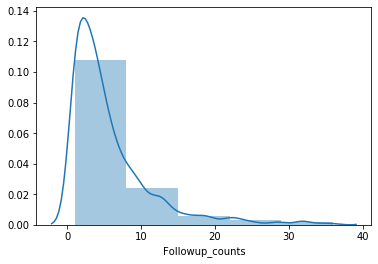

In [84]:
sns.distplot(m1['Followup_counts'],bins = 5)

In [85]:
m1['Followup_counts'].describe()

count    781.000000
mean       5.784891
std        5.728680
min        1.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       36.000000
Name: Followup_counts, dtype: float64

In [253]:
m1[(m1['Followup_counts'] > 20) & (m1['Followup_counts'] < 37)][['Gender','Age_x']].mode()   # Multiple follow ups visit by male , most frequent age - 37

,Gender,Age_x
0,1,37


labels - 1- high risk, 0 -low risk, 2 - moderate risk

In [95]:
m1[(m1['Followup_counts'] > 20) & (m1['Followup_counts'] < 37)][['Gender','Disease','OB_category']].mode() 

,Gender,Disease,OB_category
0,1,13,2


#### Healthy males only with high risk of obesity come for higher number of follow ups.

In [86]:
m1[(m1['Followup_counts'] > 1) & (m1['Followup_counts'] < 15)][['Gender','Age_x','Disease','OB_category']].mode()

,Gender,Age_x,Disease,OB_category
0,1,34,13,2


In [98]:
m1[(m1['Followup_counts'] > 15) & (m1['Followup_counts'] < 20)][['Gender','Disease','OB_category']].mode()  # males, healthy , OB 

,Gender,Disease,OB_category
0,1,13,2


In [99]:
m1[m1['Gender'] == 1]['Disease'].value_counts()

13    231
11     79
19     67
12     56
1      48
20     19
2      19
17     15
0      14
3       8
16      5
9       5
7       3
4       2
22      1
Name: Disease, dtype: int64

In [125]:
m1.corr().T

,Followup_counts,Age_x,Weight,Hip,Waist,BMI_x,Systolic_left,Diastolic_Left,Systolic_Right,Diastolic_Right,...,BMI_y,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease,lables
Followup_counts,1.000000,0.033142,0.057375,0.021484,0.053433,0.075166,-0.017449,0.020893,0.025829,0.080718,...,0.071172,-0.001993,0.040537,-0.066231,-0.005295,0.015730,-0.010172,0.002081,-0.141593,-0.001218
Age_x,0.033142,1.000000,-0.092392,0.024542,0.151841,0.141679,0.392297,0.259863,0.164338,0.014716,...,0.173373,-0.175783,0.576258,0.529683,-0.132598,-0.077869,0.166009,-0.009851,0.054490,0.551224
Weight,0.057375,-0.092392,1.000000,0.621734,0.728093,0.747894,0.137649,0.137006,-0.001430,-0.005362,...,0.706820,0.284079,-0.043922,-0.081524,0.164505,0.138804,-0.007808,0.117839,-0.224398,-0.007174
Hip,0.021484,0.024542,0.621734,1.000000,0.705698,0.568091,0.123408,0.063517,-0.007129,-0.053447,...,0.558946,-0.001185,0.076925,0.033774,0.138793,0.105015,0.009139,0.081050,-0.112275,0.067834
Waist,0.053433,0.151841,0.728093,0.705698,1.000000,0.676076,0.202306,0.212553,-0.006836,-0.044074,...,0.660149,0.048181,0.126604,0.102964,0.152985,0.119861,0.024068,0.097084,-0.171085,0.154500
BMI_x,0.075166,0.141679,0.747894,0.568091,0.676076,1.000000,0.189660,0.155432,0.040128,-0.036663,...,0.937498,-0.125415,0.160281,0.083671,0.119234,0.097139,0.034569,0.033699,-0.167153,0.154697
Systolic_left,-0.017449,0.392297,0.137649,0.123408,0.202306,0.189660,1.000000,0.722882,0.393163,0.232022,...,0.196952,0.052190,0.320169,0.223332,-0.036240,0.046022,0.066279,0.064688,-0.102691,0.242226
Diastolic_Left,0.020893,0.259863,0.137006,0.063517,0.212553,0.155432,0.722882,1.000000,0.205656,0.352246,...,0.159842,0.048327,0.251057,0.159935,0.024055,0.091976,0.041504,0.056568,-0.116973,0.245547
Systolic_Right,0.025829,0.164338,-0.001430,-0.007129,-0.006836,0.040128,0.393163,0.205656,1.000000,0.514210,...,0.034665,-0.008635,0.162238,0.074172,-0.063984,-0.047679,0.008741,0.044585,-0.018736,0.085698
Diastolic_Right,0.080718,0.014716,-0.005362,-0.053447,-0.044074,-0.036663,0.232022,0.352246,0.514210,1.000000,...,-0.033712,0.084485,0.063984,0.012759,-0.083116,-0.041067,0.049553,0.046930,-0.087366,0.080214


In [124]:
cor = m1.corr()  # using pearson's coefficient

#Correlation with labels
cor_target = abs(cor['Followup_counts'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.04]
relevant_features

Followup_counts    1.000000
Weight             0.057375
Waist              0.053433
BMI_x              0.075166
Diastolic_Right    0.080718
Blood_Sugar        0.076567
Medication_DB      0.052275
DB_category        0.050616
OB_category        0.088651
BMI_y              0.071172
is_hypertension    0.040537
Is_diabetic        0.066231
Disease            0.141593
Name: Followup_counts, dtype: float64

In [126]:
m1[(m1['Followup_counts'] > 20) & (m1['Followup_counts'] < 37)][['Gender','lables','is_hypertension','OB_category','DB_category','Is_diabetic']].mode()  

,Gender,lables,is_hypertension,OB_category,DB_category,Is_diabetic
0,1,0,0,2,0,0


#### insights: Males come for follow up more than females, also the age is in 30s

#### More of healthy ppl(males) come for follow up with just high risk of obesity.


In [141]:
m2 = m1.copy(deep = True)

In [142]:
m2.head()

,Followup_counts,Patient_ID,Age_x,Weight,Hip,Waist,BMI_x,Systolic_left,Diastolic_Left,Systolic_Right,...,BMI_y,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease,lables
0,36,NHIN24091600015014,45,69,36,34,24,123,81,140,...,23,1,0,0,0,0,0,0,1,2
1,35,NHIN14021700015003,58,57,36,34,21,142,91,140,...,21,1,1,1,0,0,0,0,1,1
2,34,NHIN29081600047019,31,69,37,35,26,121,88,140,...,26,1,0,0,0,0,0,1,1,0
3,32,D2D-38955,65,89,46,43,44,128,76,140,...,43,1,1,1,1,1,0,0,1,1
4,32,NHIN26091600015009,62,72,39,35,29,124,62,140,...,28,1,1,1,0,0,0,0,1,1


In [143]:
m2['Followup_counts'] = np.where(m2['Followup_counts']<13,0,1)

In [144]:
m2.head()

,Followup_counts,Patient_ID,Age_x,Weight,Hip,Waist,BMI_x,Systolic_left,Diastolic_Left,Systolic_Right,...,BMI_y,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease,lables
0,1,NHIN24091600015014,45,69,36,34,24,123,81,140,...,23,1,0,0,0,0,0,0,1,2
1,1,NHIN14021700015003,58,57,36,34,21,142,91,140,...,21,1,1,1,0,0,0,0,1,1
2,1,NHIN29081600047019,31,69,37,35,26,121,88,140,...,26,1,0,0,0,0,0,1,1,0
3,1,D2D-38955,65,89,46,43,44,128,76,140,...,43,1,1,1,1,1,0,0,1,1
4,1,NHIN26091600015009,62,72,39,35,29,124,62,140,...,28,1,1,1,0,0,0,0,1,1


In [145]:
m2['Followup_counts'].value_counts()

0    699
1     81
Name: Followup_counts, dtype: int64

In [146]:
m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 29 columns):
Followup_counts         780 non-null int32
Patient_ID              780 non-null object
Age_x                   780 non-null int64
Weight                  780 non-null int64
Hip                     780 non-null int64
Waist                   780 non-null int64
BMI_x                   780 non-null int64
Systolic_left           780 non-null int64
Diastolic_Left          780 non-null int64
Systolic_Right          780 non-null int64
Diastolic_Right         780 non-null int64
Blood_Sugar_Category    780 non-null int64
Blood_Sugar             780 non-null int64
Medication_DB           780 non-null int64
Medication_HTN          780 non-null int64
Medication_Thyroid      780 non-null int64
BP_riskscore            780 non-null int64
DB_category             780 non-null int64
OB_category             780 non-null int64
BMI_y                   780 non-null int64
Gender                  780 non-nu

In [147]:
Xm = m2.drop(['Followup_counts','Patient_ID','BMI_y'],axis = 1)
ym = m2['Followup_counts']

In [148]:
Xms = sc.fit_transform(Xm)


In [149]:
lr = LogisticRegression()

kfold = KFold(shuffle=True,n_splits=5,random_state=0)
score_lrm = cross_val_score(lr, Xms, ym,cv=kfold, scoring='roc_auc',n_jobs= -1)

In [150]:
np.mean(score_lrm)

0.5316713393435901

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
rf = RandomForestClassifier(n_estimators = 200,max_depth = 6 )

In [162]:
kfold = KFold(shuffle=True,n_splits=5,random_state=0)
score_rfm = cross_val_score(rf, Xms, ym,cv=kfold, scoring='roc_auc',n_jobs= -1)

In [163]:
np.mean(score_rfm)

0.6660500183105589

In [3]:
s = pd.read_excel("D:screen.xlsx")

In [4]:
s.head()

,Age,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,...,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease,cluster,Patient_ID
0,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,12-1101
1,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,12-1102
2,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,12-1103
3,39,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,12-1105
4,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,12-1106


In [5]:
s.columns  # Kprototype - screening data

Index(['Age', 'Medication_DB', 'Medication_HTN', 'Medication_Thyroid',
       'Medication_Dyslipidemia', 'Is_thyroid', 'Is_Dyslipidemia',
       'BP_riskscore', 'DB_category', 'OB_category', 'Alcohol', 'BMI',
       'Gender', 'is_hypertension', 'Is_diabetic', 'DB_family',
       'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease', 'cluster',
       'Patient_ID'],
      dtype='object')

In [132]:
s1 = s.drop(['Alcohol','Medication_Dyslipidemia','Is_thyroid'],axis =1 )

In [51]:
m.head()

,Followup_counts,Patient_ID,Age,Weight,Hip,Waist,BMI,Systolic_left,Diastolic_Left,Systolic_Right,Diastolic_Right,Blood_Sugar_Category,Blood_Sugar
35,36,NHIN24091600015014,45,69,36,34,24,123,81,140,90,0,177
70,35,NHIN14021700015003,58,57,36,34,21,142,91,140,90,0,132
104,34,NHIN29081600047019,31,69,37,35,26,121,88,140,90,2,93
136,32,NHIN05021700015001,53,50,35,33,18,102,67,140,90,0,77
168,32,D2D-38955,65,89,46,43,44,128,76,140,90,0,142


In [52]:
m1 = pd.merge(m,s1,on='Patient_ID')

In [53]:
m1.head()

,Followup_counts,Patient_ID,Age,Weight,Hip,Waist,BMI,Systolic_left,Diastolic_Left,Systolic_Right,...,OB_category,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease,cluster
0,36,NHIN24091600015014,45,69,36,34,24,123,81,140,...,1,1,0,0,0,0,0,0,1,0
1,35,NHIN14021700015003,58,57,36,34,21,142,91,140,...,0,1,1,1,0,0,0,0,1,2
2,34,NHIN29081600047019,31,69,37,35,26,121,88,140,...,2,1,0,0,0,0,0,1,0,1
3,32,NHIN05021700015001,53,50,35,33,18,102,67,140,...,0,0,0,1,1,0,0,0,1,0
4,32,D2D-38955,65,89,46,43,44,128,76,140,...,3,1,1,1,1,1,0,0,1,2


In [54]:
m1.columns

Index(['Followup_counts', 'Patient_ID', 'Age', 'Weight', 'Hip', 'Waist', 'BMI',
       'Systolic_left', 'Diastolic_Left', 'Systolic_Right', 'Diastolic_Right',
       'Blood_Sugar_Category', 'Blood_Sugar', 'Medication_DB',
       'Medication_HTN', 'Medication_Thyroid', 'Is_Dyslipidemia',
       'BP_riskscore', 'DB_category', 'OB_category', 'Gender',
       'is_hypertension', 'Is_diabetic', 'DB_family', 'Hypertension_family',
       'Heart_attack', 'Smoking', 'Disease', 'cluster'],
      dtype='object')

In [55]:
m1.to_csv('D:\merged_proto.csv',index=False) 

In [65]:
s.head()

,Age,Medication_DB,Medication_HTN,Medication_Thyroid,Medication_Dyslipidemia,Is_thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,...,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease,cluster,Patient_ID
0,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,12-1101
1,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,12-1102
2,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,12-1103
3,39,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,12-1105
4,34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,12-1106


In [131]:
s1.head()

,Medication_DB,Medication_HTN,Medication_Thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease,cluster,Patient_ID
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12-1101
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12-1102
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,12-1103
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,12-1105
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,12-1106


In [112]:
mm.head()

,Patient_ID,Systolic_left,Diastolic_Left,Blood_Sugar_Category,Blood_Sugar,Follow_up
35,NHIN24091600015014,123,81,0,177,1
70,NHIN14021700015003,142,91,0,132,1
104,NHIN29081600047019,121,88,2,93,1
136,NHIN05021700015001,102,67,0,77,1
168,D2D-38955,128,76,0,142,1


In [133]:
sm = pd.merge(s1,mm,on='Patient_ID',how = 'left')

In [134]:
sm.shape

(9998, 24)

In [135]:
sm.head()

,Age,Medication_DB,Medication_HTN,Medication_Thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,BMI,Gender,...,Heart_attack,Smoking,Disease,cluster,Patient_ID,Systolic_left,Diastolic_Left,Blood_Sugar_Category,Blood_Sugar,Follow_up
0,39,0,0,0,0,0,0,0,19.25,0,...,0,0,0,1,12-1101,NaN,NaN,NaN,NaN,NaN
1,34,0,0,0,0,0,0,0,18.86,0,...,0,0,0,1,12-1102,NaN,NaN,NaN,NaN,NaN
2,74,0,0,0,0,0,0,0,18.83,0,...,0,0,1,2,12-1103,NaN,NaN,NaN,NaN,NaN
3,39,0,0,0,0,0,1,0,19.91,0,...,0,0,0,1,12-1105,NaN,NaN,NaN,NaN,NaN
4,34,0,0,0,0,0,0,0,21.57,0,...,0,0,0,1,12-1106,NaN,NaN,NaN,NaN,NaN


In [136]:
sm.columns

Index(['Age', 'Medication_DB', 'Medication_HTN', 'Medication_Thyroid',
       'Is_Dyslipidemia', 'BP_riskscore', 'DB_category', 'OB_category', 'BMI',
       'Gender', 'is_hypertension', 'Is_diabetic', 'DB_family',
       'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease', 'cluster',
       'Patient_ID', 'Systolic_left', 'Diastolic_Left', 'Blood_Sugar_Category',
       'Blood_Sugar', 'Follow_up'],
      dtype='object')

In [137]:
sm.isnull().sum()

Age                        0
Medication_DB              0
Medication_HTN             0
Medication_Thyroid         0
Is_Dyslipidemia            0
BP_riskscore               0
DB_category                0
OB_category                0
BMI                        0
Gender                     0
is_hypertension            0
Is_diabetic                0
DB_family                  0
Hypertension_family        0
Heart_attack               0
Smoking                    0
Disease                    0
cluster                    0
Patient_ID                 0
Systolic_left           9218
Diastolic_Left          9218
Blood_Sugar_Category    9218
Blood_Sugar             9218
Follow_up               9218
dtype: int64

In [118]:
sm.tail(20)

,Medication_DB,Medication_HTN,Medication_Thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,Gender,is_hypertension,Is_diabetic,...,Heart_attack,Smoking,Disease,cluster,Patient_ID,Systolic_left,Diastolic_Left,Blood_Sugar_Category,Blood_Sugar,Follow_up
9978,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,NHIN30091600002016,NaN,NaN,NaN,NaN,NaN
9979,0,1,0,0,0,0,2,1,1,0,...,1,0,1,0,NHIN30091600015005,NaN,NaN,NaN,NaN,NaN
9980,1,1,0,0,1,1,1,1,1,1,...,0,0,1,2,NHIN30091600015008,NaN,NaN,NaN,NaN,NaN
9981,0,0,0,0,1,0,0,1,0,0,...,0,0,1,1,NHIN30091600015015,NaN,NaN,NaN,NaN,NaN
9982,0,0,0,0,0,1,1,1,0,0,...,0,0,0,0,NHIN30091600015016,NaN,NaN,NaN,NaN,NaN
9983,0,0,0,0,1,1,2,1,0,0,...,0,0,1,0,NHIN30091600018001,NaN,NaN,NaN,NaN,NaN
9984,0,0,0,0,1,0,0,1,0,0,...,0,0,1,2,NHIN30091600018002,NaN,NaN,NaN,NaN,NaN
9985,1,1,0,0,2,1,2,1,1,1,...,0,0,1,2,NHIN30091600026001,151.0,63.0,0.0,154.0,1.0
9986,1,1,0,0,0,0,3,1,1,1,...,0,1,1,0,NHIN30091600026003,NaN,NaN,NaN,NaN,NaN
9987,0,0,0,0,0,0,2,1,0,0,...,0,1,0,1,NHIN30091600026005,NaN,NaN,NaN,NaN,NaN


In [138]:
sm['Follow_up'].fillna(0,inplace = True)

In [139]:
sm['Follow_up'].isnull().sum()

0

In [140]:
sm1 = sm.drop(['Systolic_left','Diastolic_Left','Blood_Sugar_Category','Blood_Sugar'],axis = 1)

In [141]:
sm1.isnull().sum()

Age                    0
Medication_DB          0
Medication_HTN         0
Medication_Thyroid     0
Is_Dyslipidemia        0
BP_riskscore           0
DB_category            0
OB_category            0
BMI                    0
Gender                 0
is_hypertension        0
Is_diabetic            0
DB_family              0
Hypertension_family    0
Heart_attack           0
Smoking                0
Disease                0
cluster                0
Patient_ID             0
Follow_up              0
dtype: int64

In [142]:
sm1['Follow_up'].value_counts()

0.0    9218
1.0     780
Name: Follow_up, dtype: int64

In [124]:
sm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9998 entries, 0 to 9997
Data columns (total 18 columns):
Medication_DB          9998 non-null int64
Medication_HTN         9998 non-null int64
Medication_Thyroid     9998 non-null int64
Is_Dyslipidemia        9998 non-null int64
BP_riskscore           9998 non-null int64
DB_category            9998 non-null int64
OB_category            9998 non-null int64
Gender                 9998 non-null int64
is_hypertension        9998 non-null int64
Is_diabetic            9998 non-null int64
DB_family              9998 non-null int64
Hypertension_family    9998 non-null int64
Heart_attack           9998 non-null int64
Smoking                9998 non-null int64
Disease                9998 non-null int64
cluster                9998 non-null int64
Patient_ID             9998 non-null object
Follow_up              9998 non-null float64
dtypes: float64(1), int64(16), object(1)
memory usage: 1.4+ MB


In [143]:
sm1['Follow_up']= sm1['Follow_up'].astype(int)

In [144]:
sm1['Follow_up'].value_counts()

0    9218
1     780
Name: Follow_up, dtype: int64

#### The screening clustered data with the follow up column (as 0 and 1 ) is used to build the model and do further analysis.
#### Threshold tuning was done and the roc  value was around 0.68, with default threshold the roc value was 0.75

In [145]:
sm1.to_csv('D:\scrfoll.csv',index=False) 

In [3]:
sm1 = pd.read_csv('D:\scrfoll.csv')

In [4]:
sm1.corr()

,Age,Medication_DB,Medication_HTN,Medication_Thyroid,Is_Dyslipidemia,BP_riskscore,DB_category,OB_category,BMI,Gender,is_hypertension,Is_diabetic,DB_family,Hypertension_family,Heart_attack,Smoking,Disease,cluster,Follow_up
Age,1.000000,0.331905,0.447007,-0.030347,0.002700,0.295808,0.288230,0.085106,0.093767,0.073302,0.449665,0.334656,-0.092554,-0.097841,0.133106,0.044121,0.398032,0.351506,-0.022350
Medication_DB,0.331905,1.000000,0.485369,-0.001423,0.014913,0.175084,0.546944,0.108940,0.134895,0.092437,0.459977,0.966765,0.113166,0.043238,0.161437,0.006724,0.373453,0.093339,0.109427
Medication_HTN,0.447007,0.485369,1.000000,-0.007103,0.010870,0.291165,0.306275,0.142617,0.180929,0.015389,0.958693,0.465856,0.043370,0.075291,0.161444,-0.006170,0.460361,0.154431,0.065503
Medication_Thyroid,-0.030347,-0.001423,-0.007103,1.000000,-0.000566,-0.010223,-0.006061,0.006352,0.010248,-0.010009,-0.008266,-0.002320,0.002844,0.012717,-0.005122,-0.002951,0.037490,-0.005217,0.016344
Is_Dyslipidemia,0.002700,0.014913,0.010870,-0.000566,1.000000,-0.000157,-0.007997,-0.010537,-0.002567,0.014145,0.010127,0.014227,-0.007524,0.008636,-0.001810,0.021411,0.013245,0.012607,0.022256
BP_riskscore,0.295808,0.175084,0.291165,-0.010223,-0.000157,1.000000,0.194048,0.134417,0.155834,0.138383,0.306323,0.180611,0.021608,0.039281,0.019805,0.074210,0.618768,0.016438,0.026415
DB_category,0.288230,0.546944,0.306275,-0.006061,-0.007997,0.194048,1.000000,0.133395,0.157839,0.063198,0.303547,0.561278,0.087857,0.027096,0.105561,0.019528,0.379879,0.043227,0.100831
OB_category,0.085106,0.108940,0.142617,0.006352,-0.010537,0.134417,0.133395,1.000000,0.759864,0.000222,0.151363,0.112348,0.132671,0.118708,0.034161,-0.038593,0.320668,-0.116656,0.049990
BMI,0.093767,0.134895,0.180929,0.010248,-0.002567,0.155834,0.157839,0.759864,1.000000,-0.007729,0.186222,0.134796,0.153390,0.143598,0.039949,-0.043026,0.330204,-0.134564,0.071453
Gender,0.073302,0.092437,0.015389,-0.010009,0.014145,0.138383,0.063198,0.000222,-0.007729,1.000000,0.018944,0.092492,0.060068,0.040782,0.023044,0.288151,0.160979,0.030926,0.135003


In [6]:
cor = sm1.corr()
#Correlation with labels
cor_target = abs(cor['Follow_up'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.06]
relevant_features

Medication_DB      0.109427
Medication_HTN     0.065503
DB_category        0.100831
BMI                0.071453
Gender             0.135003
is_hypertension    0.063318
Is_diabetic        0.111675
DB_family          0.096222
Disease            0.119904
Follow_up          1.000000
Name: Follow_up, dtype: float64

In [7]:
sm1.columns

Index(['Age', 'Medication_DB', 'Medication_HTN', 'Medication_Thyroid',
       'Is_Dyslipidemia', 'BP_riskscore', 'DB_category', 'OB_category', 'BMI',
       'Gender', 'is_hypertension', 'Is_diabetic', 'DB_family',
       'Hypertension_family', 'Heart_attack', 'Smoking', 'Disease', 'cluster',
       'Patient_ID', 'Follow_up'],
      dtype='object')

In [8]:
# roc curve for logistic regression model with optimal threshold
from numpy import sqrt
from numpy import argmax

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

In [9]:
X = sm1.drop(['Follow_up','Patient_ID'],axis = 1)
y = sm1['Follow_up']

In [10]:
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [11]:
sc = StandardScaler()

In [12]:
trainsX = sc.fit_transform(trainX)
testsX = sc.transform(testX)

Best Threshold=0.068524, G-Mean=0.681


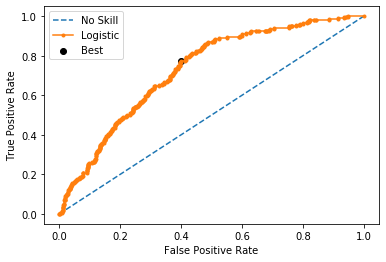

In [162]:
# fit a model
model = LogisticRegression(solver='lbfgs',max_iter=500)
model.fit(trainsX, trainy)
# predict probabilities
yhat = model.predict_proba(testsX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(testy, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

Best Threshold=0.068797, G-Mean=0.683


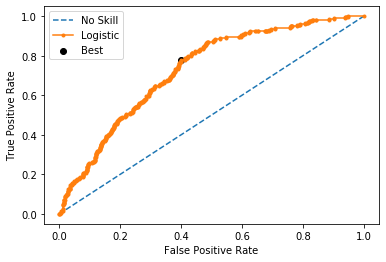

In [158]:
# fit a model
model = LogisticRegression(solver='lbfgs',max_iter=500)
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(testy, yhat)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [164]:
# fit a model
model = LogisticRegression(solver='lbfgs',max_iter = 500)
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(testy, yhat)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.051771


In [24]:
model = LogisticRegression(solver='lbfgs',max_iter = 500)
model.fit(trainX, trainy)# fit model to training datset
probs = model.predict_proba(testX) # prediction on test

threshold = 0.051771 # threshold we set where the probability prediction must be above this to be classified as a '1'
classes = probs[:,1] # say it is the class in the second column you care about predictint
classes[classes>=threshold] = 1
classes[classes<threshold] = 0
classes




array([1., 0., 0., ..., 1., 0., 0.])

In [25]:
y_pred_default = model.predict(testX)  # default threshold is 0.5
y_pred_changed = (model.predict_proba(testX)[:,1] >= threshold).astype(int)
print(y_pred_default)
print(y_pred_changed)

# Confusion Matrix
from sklearn.metrics import confusion_matrix 
print("Confusion Matrix with threshold 0.5: ")
print(confusion_matrix(testy, y_pred_default))

print("Confusion Matrix with threshold 0.051771: ")
print(confusion_matrix(testy, y_pred_changed))


[0 0 0 ... 0 0 0]
[1 0 0 ... 1 0 0]
Confusion Matrix with threshold 0.5: 
[[2763    3]
 [ 234    0]]
Confusion Matrix with threshold 0.051771: 
[[1412 1354]
 [  30  204]]


In [21]:
from sklearn.metrics import classification_report,f1_score,roc_auc_score

In [26]:
print('classification_report', classification_report(testy,y_pred_changed))


classification_report               precision    recall  f1-score   support

           0       0.98      0.51      0.67      2766
           1       0.13      0.87      0.23       234

    accuracy                           0.54      3000
   macro avg       0.56      0.69      0.45      3000
weighted avg       0.91      0.54      0.64      3000



In [27]:
score = roc_auc_score(testy,y_pred_changed)

In [28]:
print(score)

0.6911396629400968


In [33]:
# fit a model
model_rf = RandomForestClassifier(n_estimators = 200,criterion = 'entropy',max_depth = 5)
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(testy, yhat)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.051771


In [34]:
y_pred_rf = (model.predict_proba(testX)[:,1] >= threshold).astype(int)

In [35]:
score_rf = roc_auc_score(testy,y_pred_rf)
print(score_rf)

0.6911396629400968


Tuning the threshold gives us an roc_auc score of 0.69

In [36]:
#SMOTE

print("Before OverSampling, counts of label '1':",np.sum(trainy == 1))
print("Before OverSampling, counts of label '0':",np.sum(trainy == 0)) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
smt = SMOTE(random_state = 2) 
X_train_res, y_train_res = smt.fit_sample(trainX, trainy) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 546
Before OverSampling, counts of label '0': 6452
After OverSampling, the shape of train_X: (12904, 18)
After OverSampling, the shape of train_y: (12904,) 

After OverSampling, counts of label '1': 6452
After OverSampling, counts of label '0': 6452


In [38]:
model = LogisticRegression(solver='lbfgs',max_iter = 500)
model.fit(X_train_res, y_train_res) 
predictions = model.predict(testX) 
  
# print classification report 
print(classification_report(testy, predictions)) 

              precision    recall  f1-score   support

           0       0.95      0.67      0.78      2766
           1       0.13      0.56      0.21       234

    accuracy                           0.66      3000
   macro avg       0.54      0.62      0.49      3000
weighted avg       0.88      0.66      0.74      3000



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [39]:
score_smote = roc_auc_score(testy,predictions)

In [40]:
print(score_smote )  #smote reduces the roc_auc_score.

0.61628844763335


In [41]:
from xgboost import XGBClassifier

In [52]:
from xgboost import XGBClassifier
xgb=XGBClassifier(
 learning_rate =0.01,
 n_estimators=1000,
 max_depth=6,
 colsample_bytree=0.8,
 seed=100,n_jobs = -1)
xgb_model=xgb.fit(trainsX,trainy)

In [53]:
y_pred_xgb = (xgb.predict_proba(testsX)[:,1] >= threshold).astype(int)

In [54]:
score_xgb = roc_auc_score(testy,y_pred_xgb)
score_xgb

0.6953251015073141

In [55]:
from xgboost import XGBClassifier
xgb1=XGBClassifier(
 learning_rate =0.01,
 n_estimators=500,
 max_depth=6,
 colsample_bytree=0.8,
 seed=100,n_jobs = -1)
xgb_model1=xgb1.fit(trainsX,trainy)

In [56]:
y_pred_xgb1 = (xgb.predict_proba(testsX)[:,1] >= threshold).astype(int)
score_xgb1 = roc_auc_score(testy,y_pred_xgb1)
score_xgb1

0.6953251015073141

In [57]:
from lightgbm import LGBMClassifier

In [65]:
from lightgbm import LGBMClassifier
lgb_fit_params={"early_stopping_rounds":200, 
            
            "eval_set" : [(testsX,testy)],
            'eval_names': ['valid'],
            'verbose':100
           }
lgb_params = {'boosting_type': 'gbdt',
 
 'verbose': 0,
 'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'lambda_l1': 0.01,
 'lambda_l2': 0.01,
 'learning_rate': 0.01,
 'max_bin': 255,
 'max_depth': 6,
 'min_data_in_bin': 1,
 'min_data_in_leaf': 1,
 'num_leaves': 31}

In [71]:
lgb = LGBMClassifier(n_estimators=6000, **lgb_params, random_state=123456789, n_jobs=-1)
lgb.fit(trainsX, trainy, **lgb_fit_params)
lgb.best_iteration_

Training until validation scores don't improve for 200 rounds
[100]	valid's binary_logloss: 0.246573
[200]	valid's binary_logloss: 0.240839
[300]	valid's binary_logloss: 0.240576
[400]	valid's binary_logloss: 0.241797
Early stopping, best iteration is:
[227]	valid's binary_logloss: 0.240385


227

In [72]:

clf_lgb=LGBMClassifier(n_estimators=int(lgb.best_iteration_*1.2), **lgb_params)
lgb_model=clf_lgb.fit(trainsX, trainy)

In [73]:
y_pred_lgb = (lgb_model.predict_proba(testsX)[:,1] >= threshold).astype(int)
score_lgb = roc_auc_score(testy,y_pred_lgb)
score_lgb

0.6988801750190037

In [74]:
lgb_score=cross_val_score(X=trainsX,y=trainy,estimator=clf_lgb,scoring='roc_auc',cv=5)

In [75]:
np.mean(lgb_score)

0.756804361253314